# Data Dictionary

## [Link to dataset](https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction)

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-za14{border-color:inherit;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-za14">Column Name</th>
    <th class="tg-za14">Description</th>
    <th class="tg-za14">Data Type</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-za14">model</td>
    <td class="tg-za14">Ford Car Brands</td>
    <td class="tg-za14">Categorical</td>
  </tr>
  <tr>
    <td class="tg-za14">year</td>
    <td class="tg-za14">Production Year</td>
    <td class="tg-za14">Numerical (Integer)</td>
  </tr>
  <tr>
    <td class="tg-za14">price</td>
    <td class="tg-za14">Price of car in $</td>
    <td class="tg-za14">Numerical (Float)</td>
  </tr>
  <tr>
    <td class="tg-za14">transmission</td>
    <td class="tg-za14">Transmission Type</td>
    <td class="tg-za14">Categorical</td>
  </tr>
  <tr>
    <td class="tg-za14">mileage</td>
    <td class="tg-za14">Number of miles traveled</td>
    <td class="tg-za14">Numerical (Integer)</td>
  </tr>
  <tr>
    <td class="tg-za14">fuelType</td>
    <td class="tg-za14">Type of fuel</td>
    <td class="tg-za14">Categorical</td>
  </tr>
  <tr>
    <td class="tg-za14">tax</td>
    <td class="tg-za14">Annual Tax</td>
    <td class="tg-za14">Numerical (Integer)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">mpg</td>
    <td class="tg-7zrl">Miles per Gallon</td>
    <td class="tg-7zrl">Numerical (Float)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">engineSize</td>
    <td class="tg-7zrl">Car's Engine Size</td>
    <td class="tg-7zrl">Numerical (Float)</td>
  </tr>
</tbody></table>

# Import libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings

# Ignore FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

/kaggle/input/ford-car-price-prediction/ford.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import optuna

# Load dataset

In [3]:
df=pd.read_csv("/kaggle/input/ford-car-price-prediction/ford.csv")
df

model  year  price transmission  mileage fuelType  tax   mpg  \
0       Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7   
1        Focus  2018  14000       Manual     9083   Petrol  150  57.7   
2        Focus  2017  13000       Manual    12456   Petrol  150  57.7   
3       Fiesta  2019  17500       Manual    10460   Petrol  145  40.3   
4       Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
17961    B-MAX  2017   8999       Manual    16700   Petrol  150  47.1   
17962    B-MAX  2014   7499       Manual    40700   Petrol   30  57.7   
17963    Focus  2015   9999       Manual     7010   Diesel   20  67.3   
17964       KA  2018   8299       Manual     5007   Petrol  145  57.7   
17965    Focus  2015   8299       Manual     5007   Petrol   22  57.7   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3             1.5  
4             1.0  
...           ...  
17961         1.4  
17962         1.0  
17963         1.6  
17964         1.2  
17965         1.0  

[17966 rows x 9 columns]

In [4]:
# Get the total number of rows in the DataFrame
total_rows = len(df)

# Calculate the number of rows for a 50% sample
sample_size = int(0.30 * total_rows)

# Randomly sample 50% of the rows
df = df.sample(n=sample_size, random_state=42) # random_state for reproducibility

# Split Dataset

In [5]:
#x = df.drop('MEDV', axis=1) 
#y = df['MEDV'] 

# Split the data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) 

# Print the shapes of the resulting sets
print("X_train shape:", df_train.shape)
#print("y_train shape:", y_train.shape)
print("X_test shape:", df_test.shape)
#print("y_test shape:", y_test.shape)

X_train shape: (4311, 9)
X_test shape: (1078, 9)


# EDA

## Basic Statistics

In [6]:
df_train.head()

model  year  price transmission  mileage fuelType  tax   mpg  \
17772   Fiesta  2020  16499       Manual     8786   Petrol  150  60.1   
1475    Fiesta  2013   5720       Manual    31998   Petrol   30  54.3   
2807    Fiesta  2015   7995       Manual     8700   Petrol  125  54.3   
14609   Fiesta  2017  10449       Manual    17468   Diesel    0  78.5   
9633    Fiesta  2013   6650       Manual    28620   Petrol    0  65.7   

       engineSize  
17772         1.0  
1475          1.2  
2807          1.2  
14609         1.5  
9633          1.0

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4311 entries, 17772 to 13250
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4311 non-null   object 
 1   year          4311 non-null   int64  
 2   price         4311 non-null   int64  
 3   transmission  4311 non-null   object 
 4   mileage       4311 non-null   int64  
 5   fuelType      4311 non-null   object 
 6   tax           4311 non-null   int64  
 7   mpg           4311 non-null   float64
 8   engineSize    4311 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 336.8+ KB


In [8]:
df_train.describe()

year         price        mileage          tax          mpg  \
count  4311.000000   4311.000000    4311.000000  4311.000000  4311.000000   
mean   2016.828346  12285.756669   23729.738112   114.308745    57.621967   
std       2.113539   4794.151307   20177.942008    60.789069    10.361777   
min    1998.000000    495.000000       5.000000     0.000000    20.800000   
25%    2016.000000   8999.000000   10164.500000   125.000000    52.300000   
50%    2017.000000  11290.000000   18156.000000   145.000000    57.700000   
75%    2018.000000  15298.500000   31318.500000   145.000000    64.200000   
max    2020.000000  49999.000000  177644.000000   580.000000   201.800000   

        engineSize  
count  4311.000000  
mean      1.360891  
std       0.443642  
min       0.000000  
25%       1.000000  
50%       1.200000  
75%       1.600000  
max       5.000000

In [9]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

## Check duplicate data

In [10]:
# Check for duplicate rows
A = df_train.duplicated()
# Convert the Series to a DataFrame.  Crucially, give it a name.
A = pd.DataFrame(A, columns=['Duplicated'])
# Get the unique values from the 'Duplicated' column
unique_values = A['Duplicated'].unique()
unique_values

array([False,  True])

In [11]:
# Check for duplicate rows
A = df_test.duplicated()
# Convert the Series to a DataFrame.  Crucially, give it a name.
A = pd.DataFrame(A, columns=['Duplicated'])
# Get the unique values from the 'Duplicated' column
unique_values = A['Duplicated'].unique()
unique_values

array([False])

## Visualize dataset

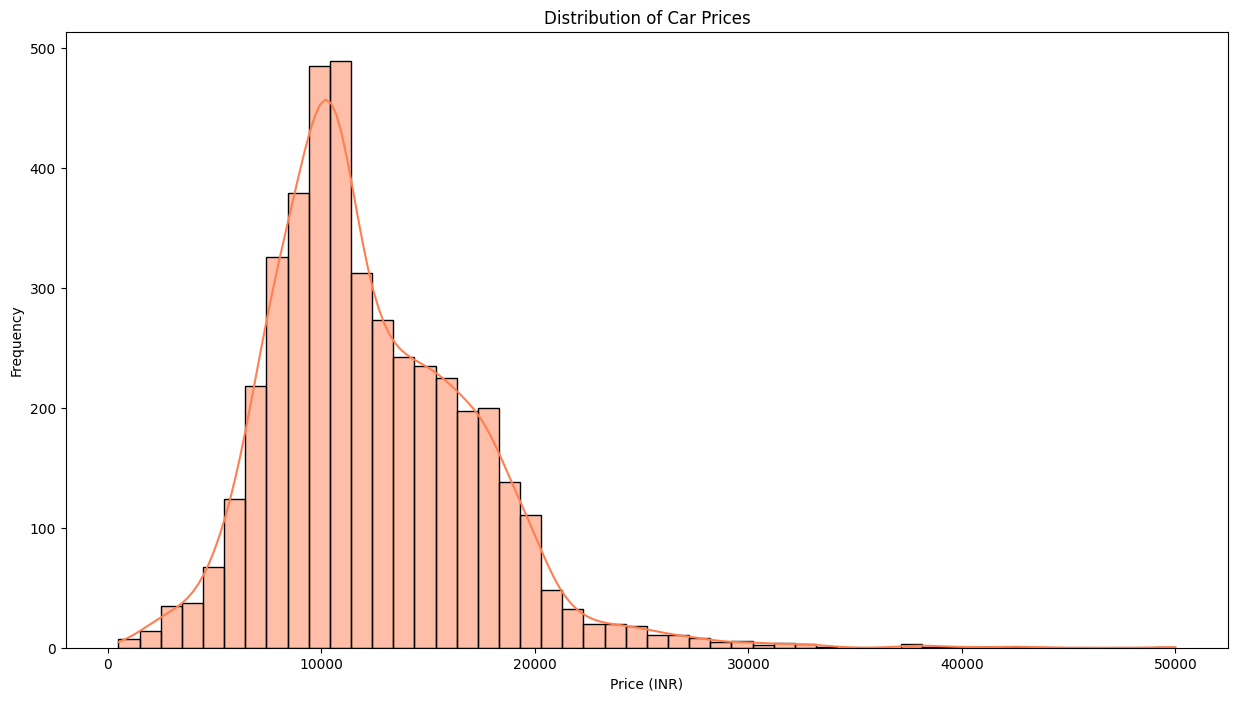

In [12]:
plt.figure(figsize=(15, 8))
sns.histplot(df_train['price'], bins=50, kde=True, color="coral")
plt.title('Distribution of Car Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

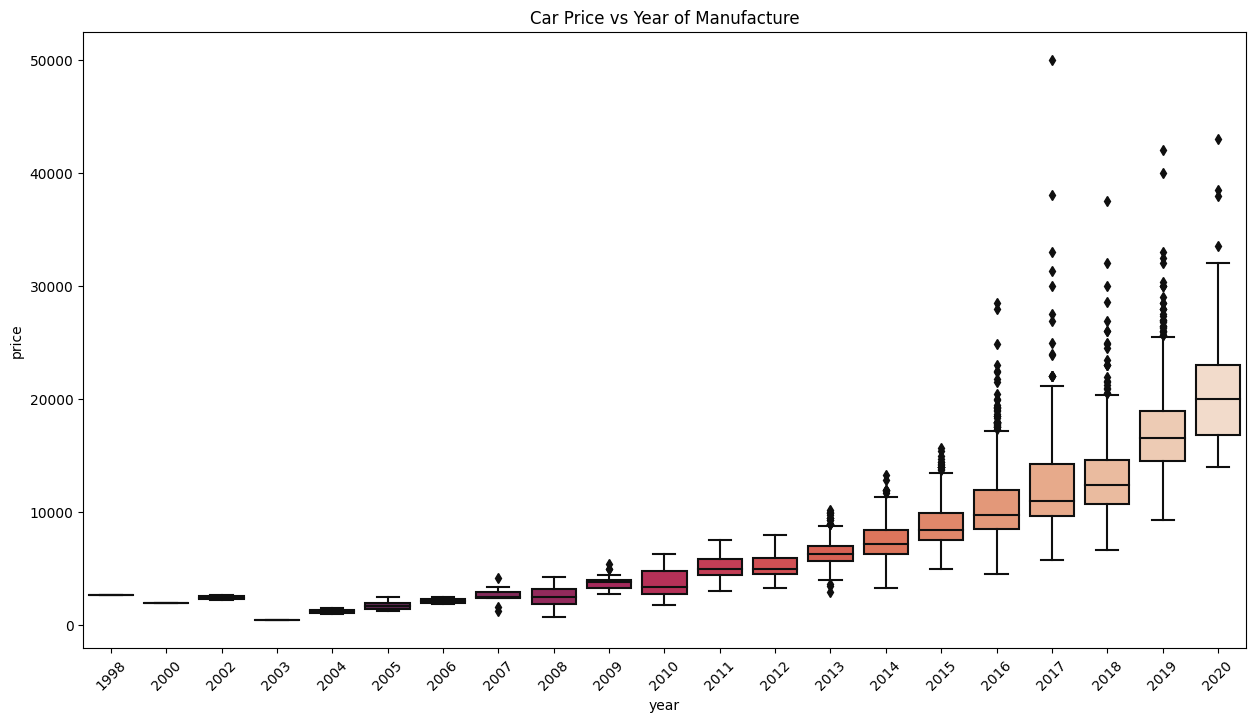

In [13]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='year', y='price', data=df_train, palette='rocket')
plt.xticks(rotation=45)
plt.title('Car Price vs Year of Manufacture')
plt.show()

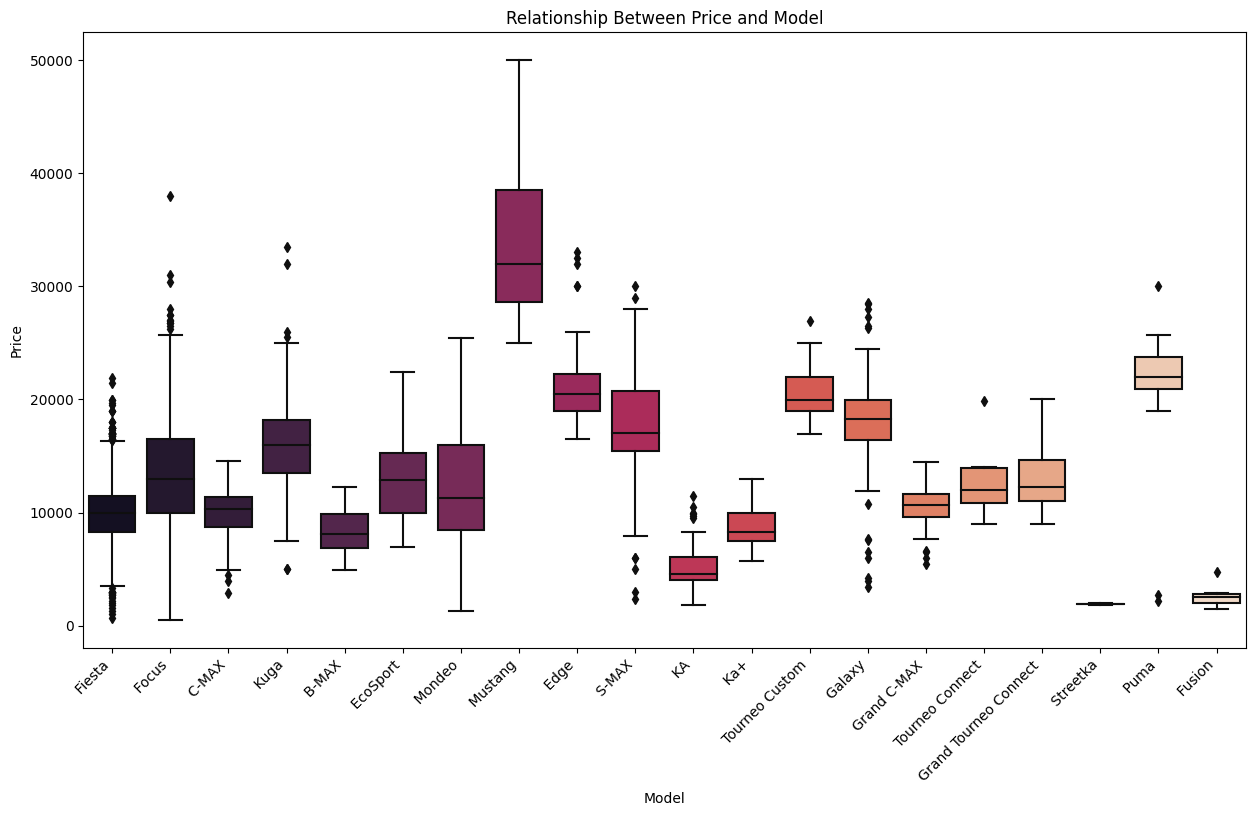

In [14]:
plt.figure(figsize=(15, 8))

# Create a box plot to visualize the relationship between price and model
sns.boxplot(x="model", y="price", data=df_train, palette='rocket')

# Rotate x-axis labels for better readability if there are many models
plt.xticks(rotation=45, ha="right")

# Set the title and labels
plt.title("Relationship Between Price and Model")
plt.xlabel("Model")
plt.ylabel("Price")

# Show the plot
plt.show()

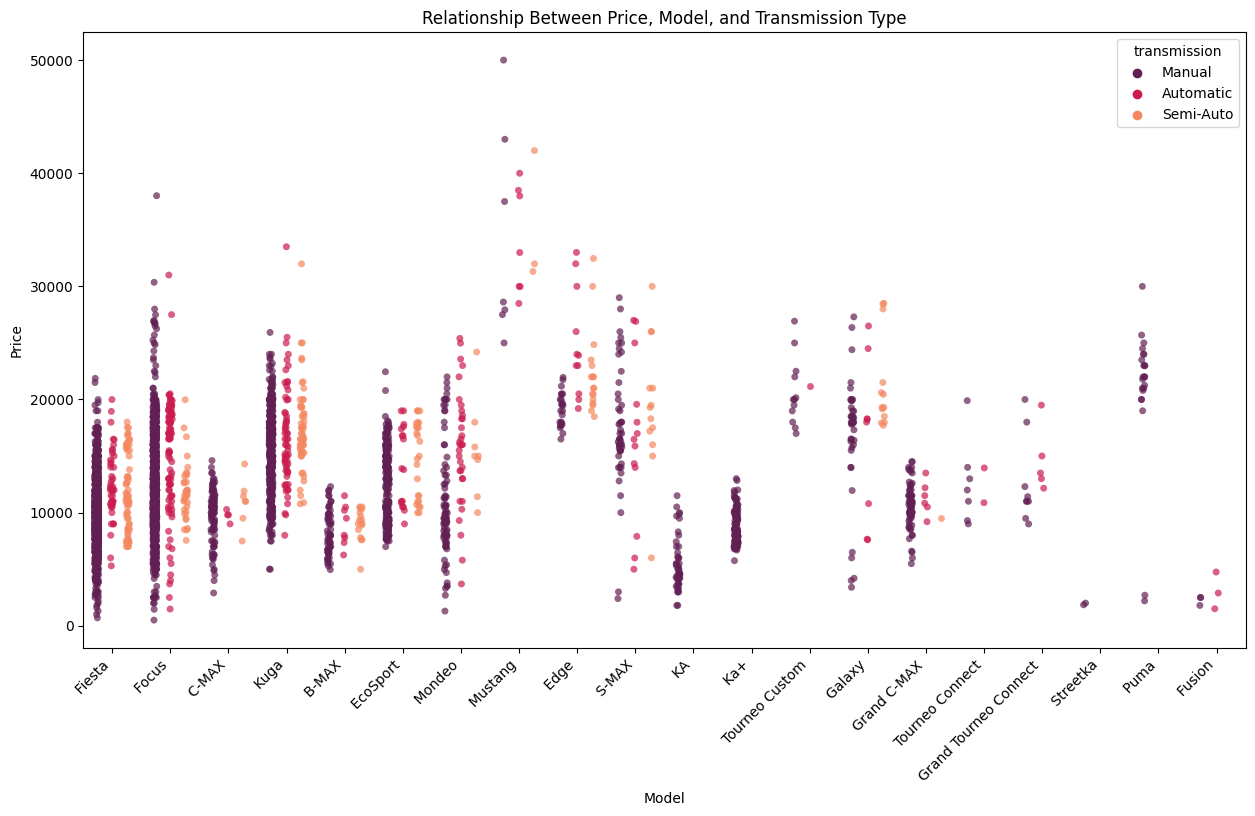

In [15]:
# Set the plot size for better visibility
plt.figure(figsize=(15, 8))

# Create a strip plot to visualize the relationship between price, model, and transmission
sns.stripplot(x="model", y="price", hue="transmission", data=df_train, jitter=True, dodge=True, alpha=0.7, palette='rocket')

# Rotate x-axis labels for better readability if there are many models
plt.xticks(rotation=45, ha="right")

# Set the title and labels
plt.title("Relationship Between Price, Model, and Transmission Type")
plt.xlabel("Model")
plt.ylabel("Price")

# Show the plot
plt.show()

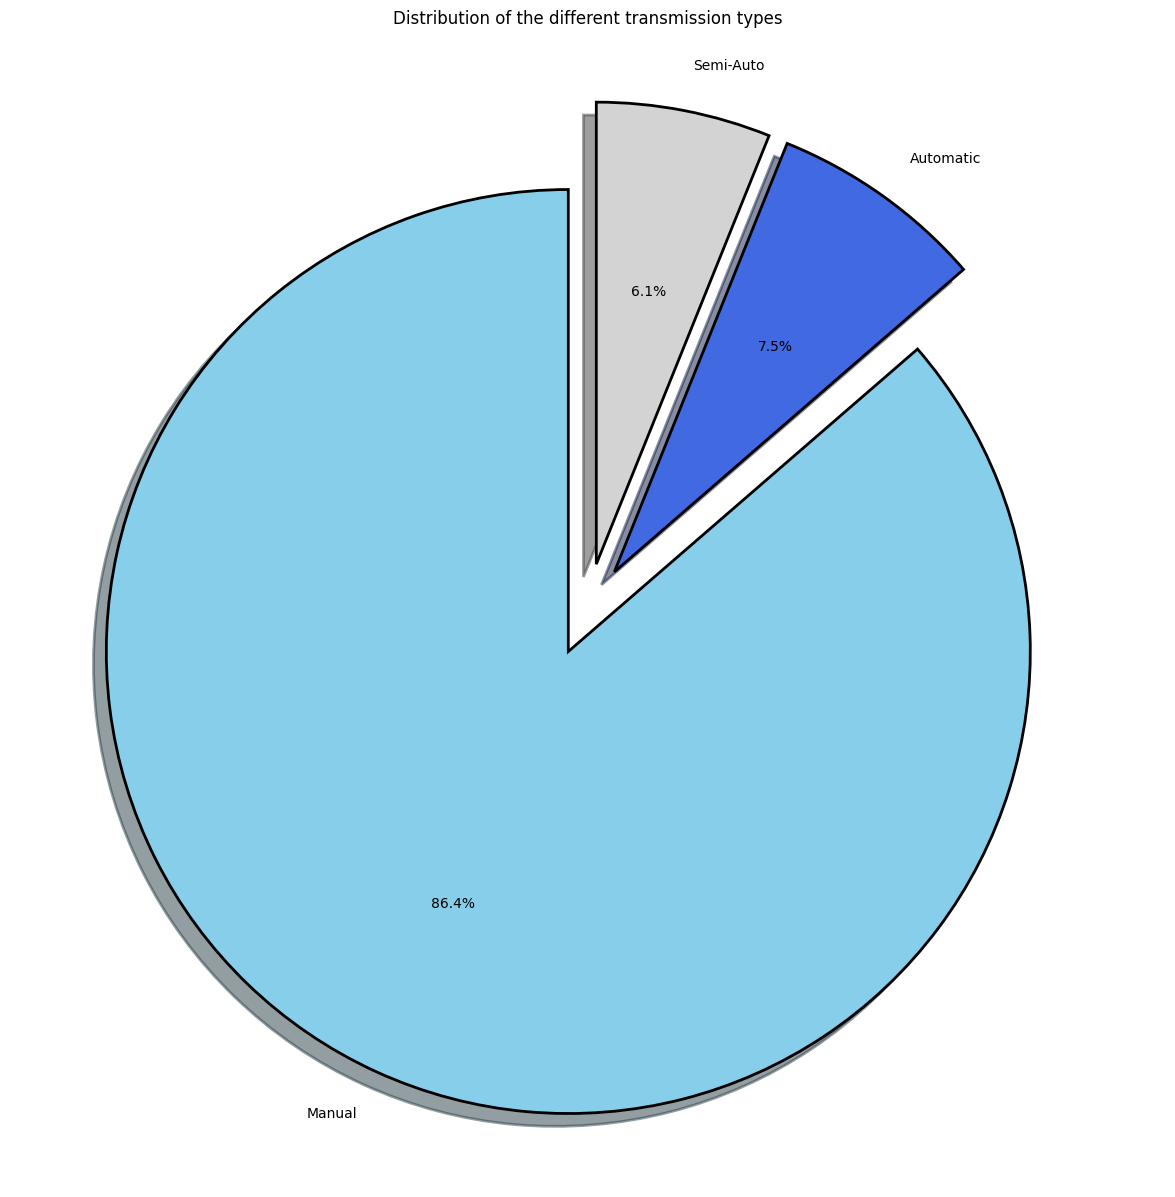

In [16]:
fig = plt.figure(figsize=(15,15))
colors = ("skyblue", "royalblue", "lightgray")
# Set wedge properties
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df_train['transmission'].value_counts()

# determines how much each slice in a pie chart is separated from the center.
explode= (0.1, 0.1, 0.1)

tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors, startangle=90, 
          wedgeprops = wp, explode=explode, label='')
plt.title('Distribution of the different transmission types')
plt.show()

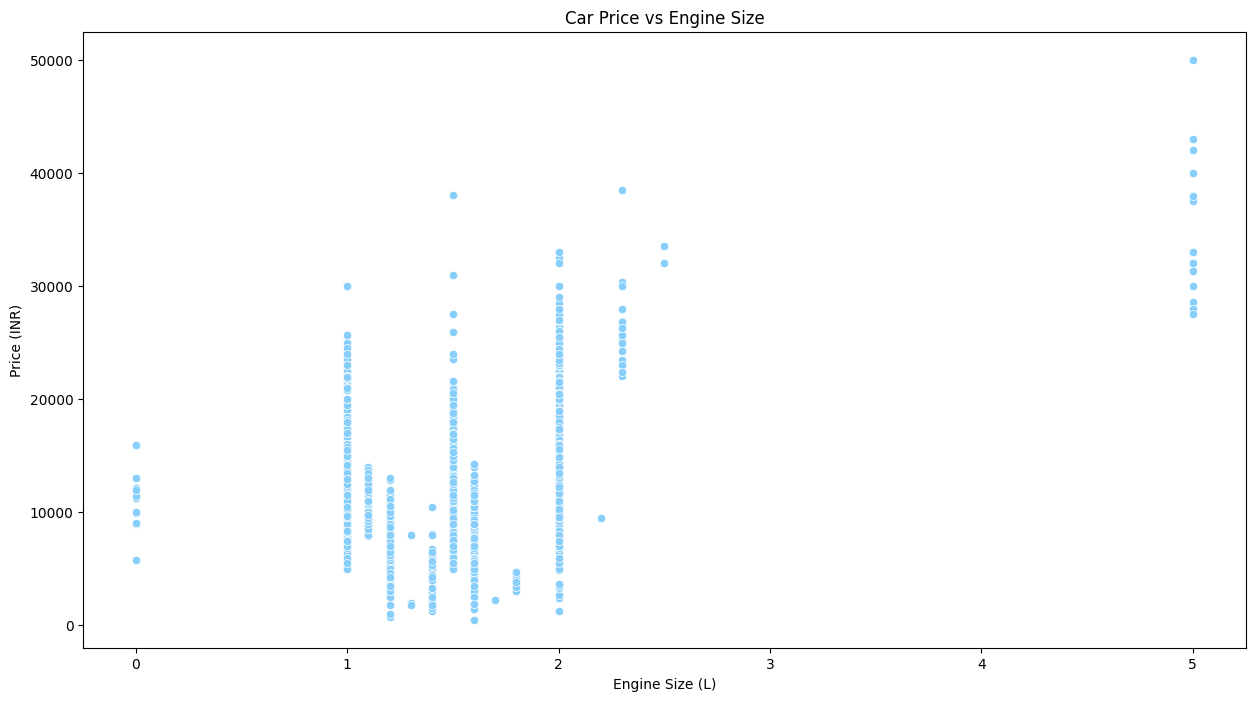

In [17]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='engineSize', y='price', data=df_train, color='lightskyblue')
plt.title('Car Price vs Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('Price (INR)')
plt.show()

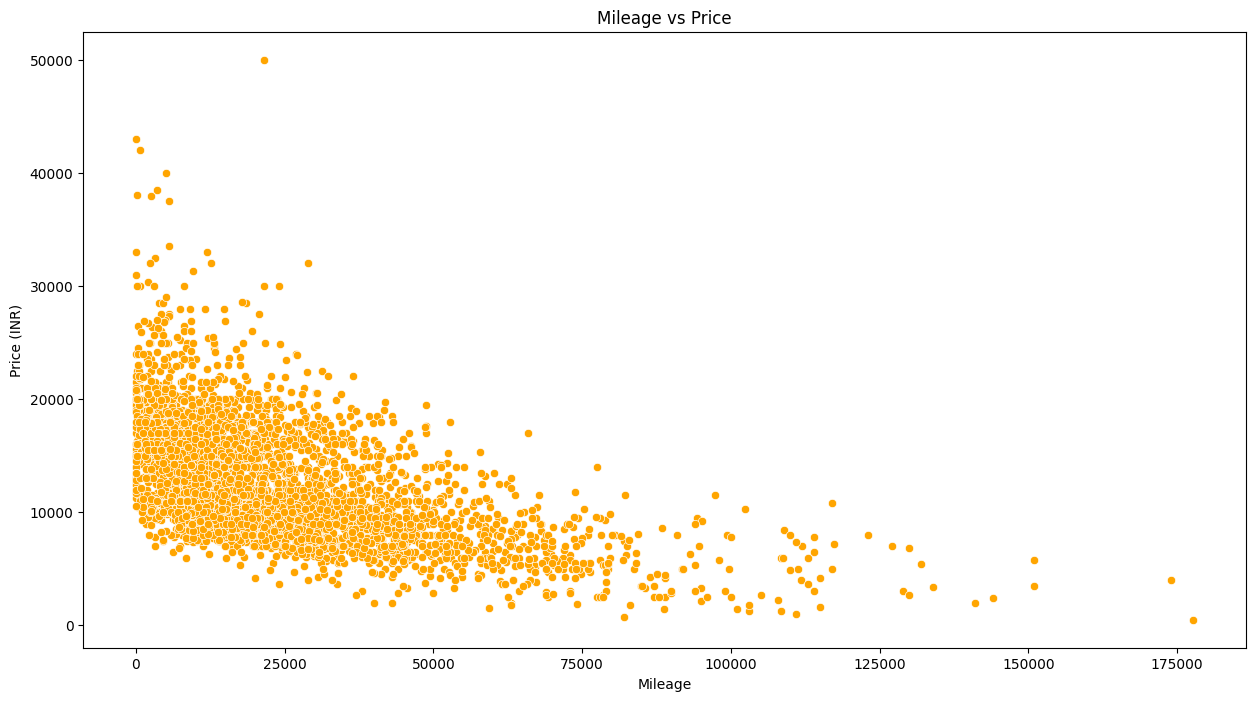

In [18]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='mileage', y='price', data=df_train, color='orange')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price (INR)')
plt.show()

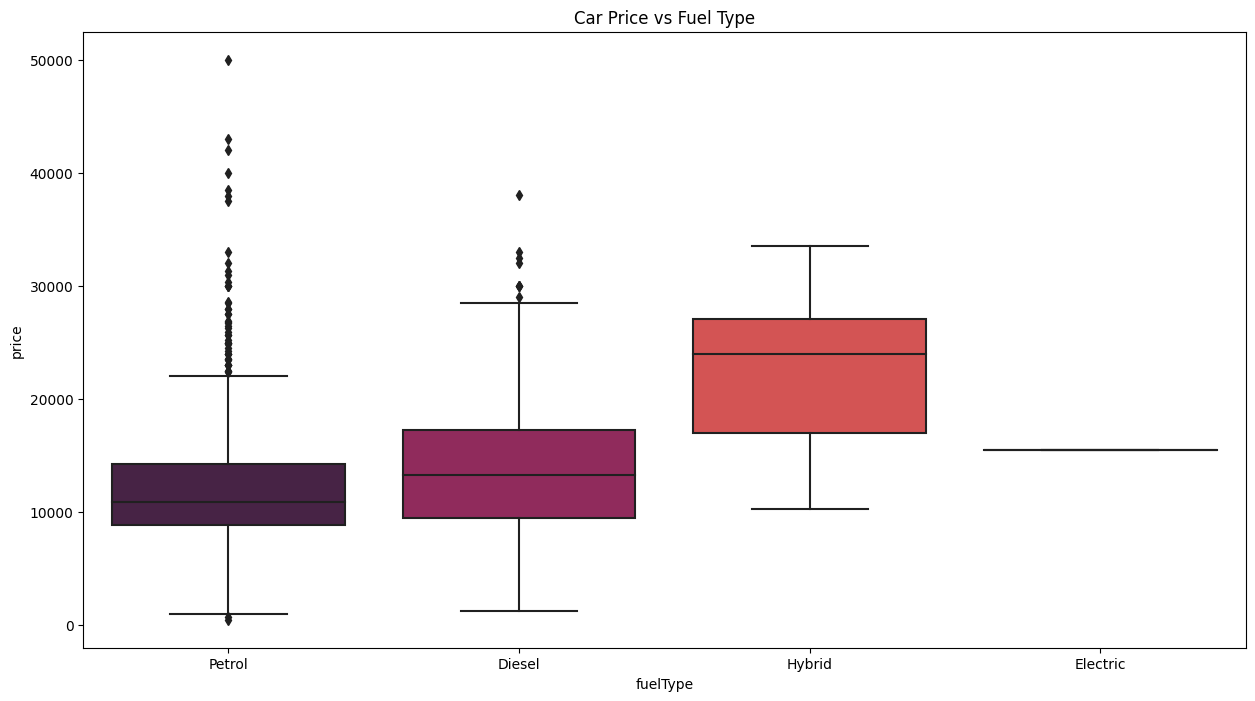

In [19]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='fuelType', y='price', data=df_train, palette='rocket')
plt.title('Car Price vs Fuel Type')
plt.show()

## Correlation analysis

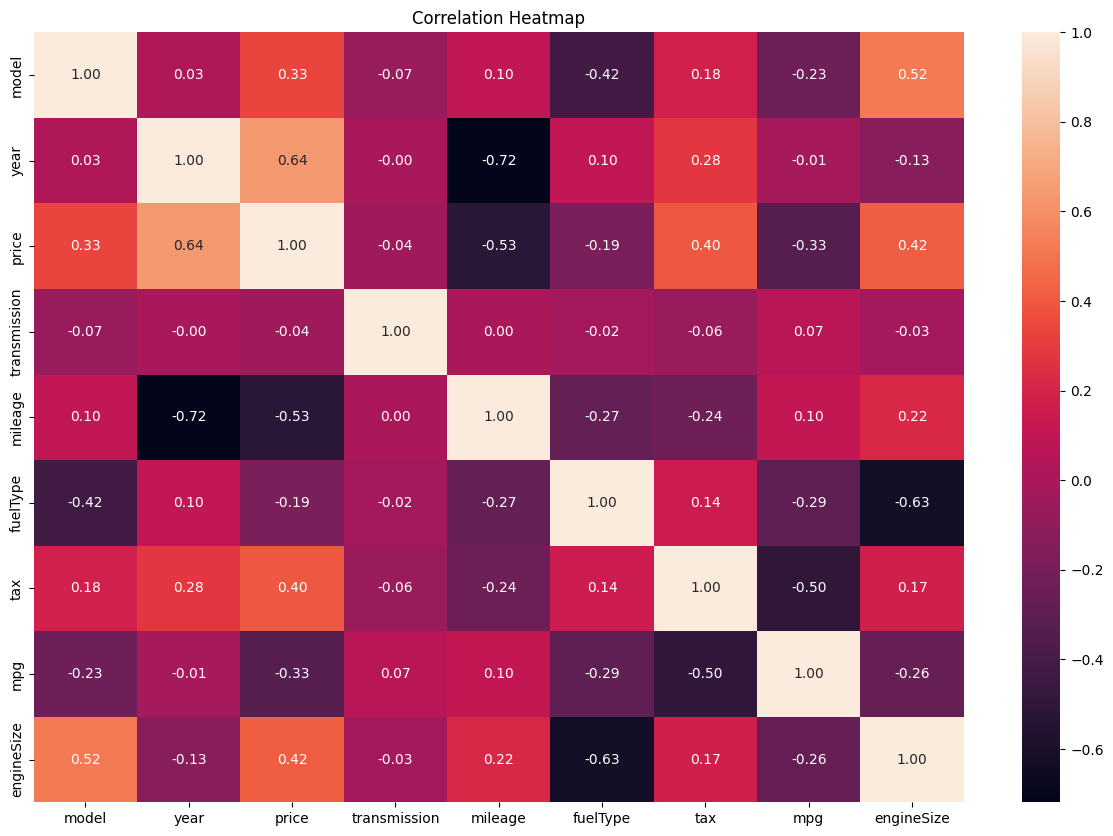

In [20]:
# Convert categorical variables to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['model', 'transmission', 'fuelType']

df_encoded = df_train.copy()
encoder = LabelEncoder()

for col in categorical_cols:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

# Now generate the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineer

## Drop duplicate rows

In [21]:
df_train = df_train.drop_duplicates()
# Check for duplicate rows
A = df_train.duplicated()
# Convert the Series to a DataFrame.  Crucially, give it a name.
A = pd.DataFrame(A, columns=['Duplicated'])
# Get the unique values from the 'Duplicated' column
unique_values = A['Duplicated'].unique()
unique_values

array([False])

In [22]:
df_test = df_test.drop_duplicates()
# Check for duplicate rows
A = df_train.duplicated()
# Convert the Series to a DataFrame.  Crucially, give it a name.
A = pd.DataFrame(A, columns=['Duplicated'])
# Get the unique values from the 'Duplicated' column
unique_values = A['Duplicated'].unique()
unique_values

array([False])

## Split features and target labels

In [23]:
y_train = df_train['price'] 
x_train = df_train.drop('price', axis=1) 
y_test = df_test['price'] 
x_test = df_test.drop('price', axis=1) 

# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4299, 8)
y_train shape: (4299,)
X_test shape: (1078, 8)
y_test shape: (1078,)


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4299 entries, 17772 to 13250
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4299 non-null   object 
 1   year          4299 non-null   int64  
 2   price         4299 non-null   int64  
 3   transmission  4299 non-null   object 
 4   mileage       4299 non-null   int64  
 5   fuelType      4299 non-null   object 
 6   tax           4299 non-null   int64  
 7   mpg           4299 non-null   float64
 8   engineSize    4299 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 335.9+ KB


## Data normalization and encode categorical columns

In [25]:
# If they are not, convert them or provide column information
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)
if not isinstance(x_test, pd.DataFrame):
    x_test = pd.DataFrame(x_test)

# Identify numerical and categorical columns
numerical_cols = x_train.select_dtypes(include=[np.number]).columns
categorical_cols = x_train.select_dtypes(exclude=[np.number]).columns

# Initialize the scalers and encoders
scaler = StandardScaler()
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform numerical columns
x_train_numerical = pd.DataFrame(scaler.fit_transform(x_train[numerical_cols]), columns=numerical_cols, index=x_train.index)
x_test_numerical = pd.DataFrame(scaler.transform(x_test[numerical_cols]), columns=numerical_cols, index=x_test.index)

# Fit and transform categorical columns
x_train_categorical = pd.DataFrame(encoder.fit_transform(x_train[categorical_cols]), columns=categorical_cols, index=x_train.index)
x_test_categorical = pd.DataFrame(encoder.transform(x_test[categorical_cols]), columns=categorical_cols, index=x_test.index)

# Combine the scaled numerical and encoded categorical columns
x_train_processed = pd.concat([x_train_numerical, x_train_categorical], axis=1)
x_test_processed = pd.concat([x_test_numerical, x_test_categorical], axis=1)

# Display information about x_train_processed
x_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4299 entries, 17772 to 13250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          4299 non-null   float64
 1   mileage       4299 non-null   float64
 2   tax           4299 non-null   float64
 3   mpg           4299 non-null   float64
 4   engineSize    4299 non-null   float64
 5   model         4299 non-null   float64
 6   transmission  4299 non-null   float64
 7   fuelType      4299 non-null   float64
dtypes: float64(8)
memory usage: 302.3 KB


## Dimensionality Reduction

In [26]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions.  Adjust as needed.
x_train = pca.fit_transform(x_train_processed) # Use the encoded data
x_test = pca.transform(x_test_processed)    # Use the encoded data

## Visualize data after dimensionality reduction

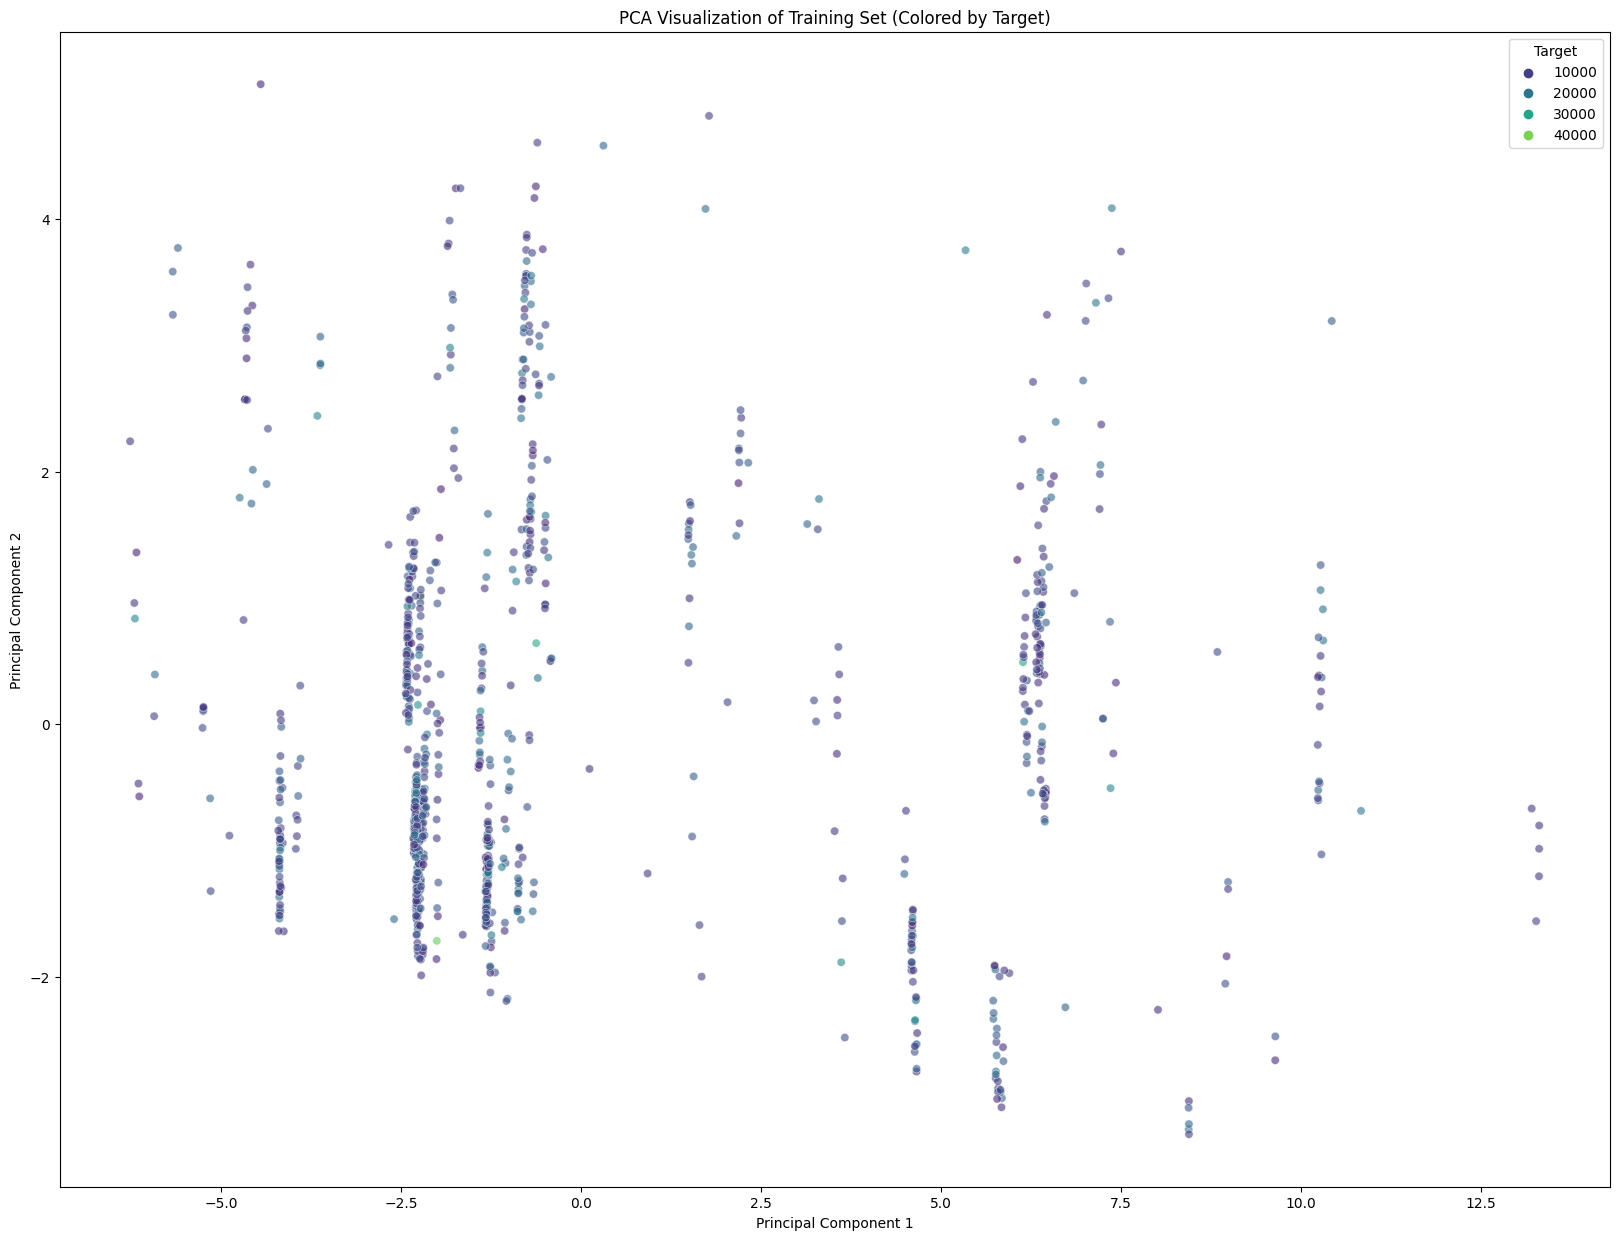

In [27]:
# Convert the PCA output to DataFrame for better readability
x_train_pca_df = pd.DataFrame(x_train, columns=['PC1', 'PC2'])

# --- Visualize the PCA-transformed training data ---
plot_data = pd.DataFrame({
    'PC1': x_train_pca_df['PC1'],  # First principal component
    'PC2': x_train_pca_df['PC2'],  # Second principal component
    'Target': y_train              # Target variable for coloring
})

# Create the scatter plot
plt.figure(figsize=(20, 15))  # Adjusted size for better proportions
sns.scatterplot(
    data=plot_data,
    x="PC1",
    y="PC2",
    hue="Target",  # Color by target variable (e.g., class: edible or poisonous)
    palette="viridis",  # Continuous palette (suitable for numeric targets)
    alpha=0.6  # Slight transparency for overlapping points
)

# Set labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Training Set (Colored by Target)")

# Show the plot
plt.show()

# Modeling, Experiments, and Visualization

## Training initial model

In [28]:
# Define the list of regression models
ml_models = [
    ("LinearSVR", LinearSVR(random_state=42, max_iter=1000)),  # Added max_iter for convergence
    ("NuSVR", NuSVR()),
    ("SVR", SVR())
]


# Perform cross-validation for each model with multiple metrics
for name, model in ml_models:
    print(f"{name}: ")
    model.fit(x_train, y_train)  # Fit on training data
    # Evaluate with multiple regression metrics
    mse_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
    
    print("\tCross-Validation (Negative Mean Squared Error):", mse_scores)
    print(f'\tAverage Cross-Validation (Negative Mean Squared Error): {mse_scores.mean():.4f}')
    print("\tCross-Validation (Negative Mean Absolute Error):", mae_scores)
    print(f'\tAverage Cross-Validation (Negative Mean Absolute Error): {mae_scores.mean():.4f}')
    print("\tCross-Validation (R-squared):", r2_scores)
    print(f'\tAverage Cross-Validation (R-squared): {r2_scores.mean():.4f}')
    print('-' * 100)

LinearSVR: 
	Cross-Validation (Negative Mean Squared Error): [-9.84107876e+07 -1.04934489e+08 -1.15339583e+08 -1.02734950e+08
 -9.19186137e+07]
	Average Cross-Validation (Negative Mean Squared Error): -102667684.7039
	Cross-Validation (Negative Mean Absolute Error): [-8777.73106419 -9085.05074687 -9336.77829739 -8942.76013364
 -8614.03838016]
	Average Cross-Validation (Negative Mean Absolute Error): -8951.2717
	Cross-Validation (R-squared): [-3.24375407 -3.76708914 -3.23970128 -3.51765803 -3.73358618]
	Average Cross-Validation (R-squared): -3.5004
----------------------------------------------------------------------------------------------------
NuSVR: 
	Cross-Validation (Negative Mean Squared Error): [-22647571.2396439  -21534449.25429048 -26945716.85570623
 -22224187.78830576 -18974166.00804665]
	Average Cross-Validation (Negative Mean Squared Error): -22465218.2292
	Cross-Validation (Negative Mean Absolute Error): [-3697.8790657  -3613.71796766 -3851.80637984 -3629.90021694
 -3543.

## Different SVM classifiers kernal function for regression using regression hypersurface

### SVR (2D)

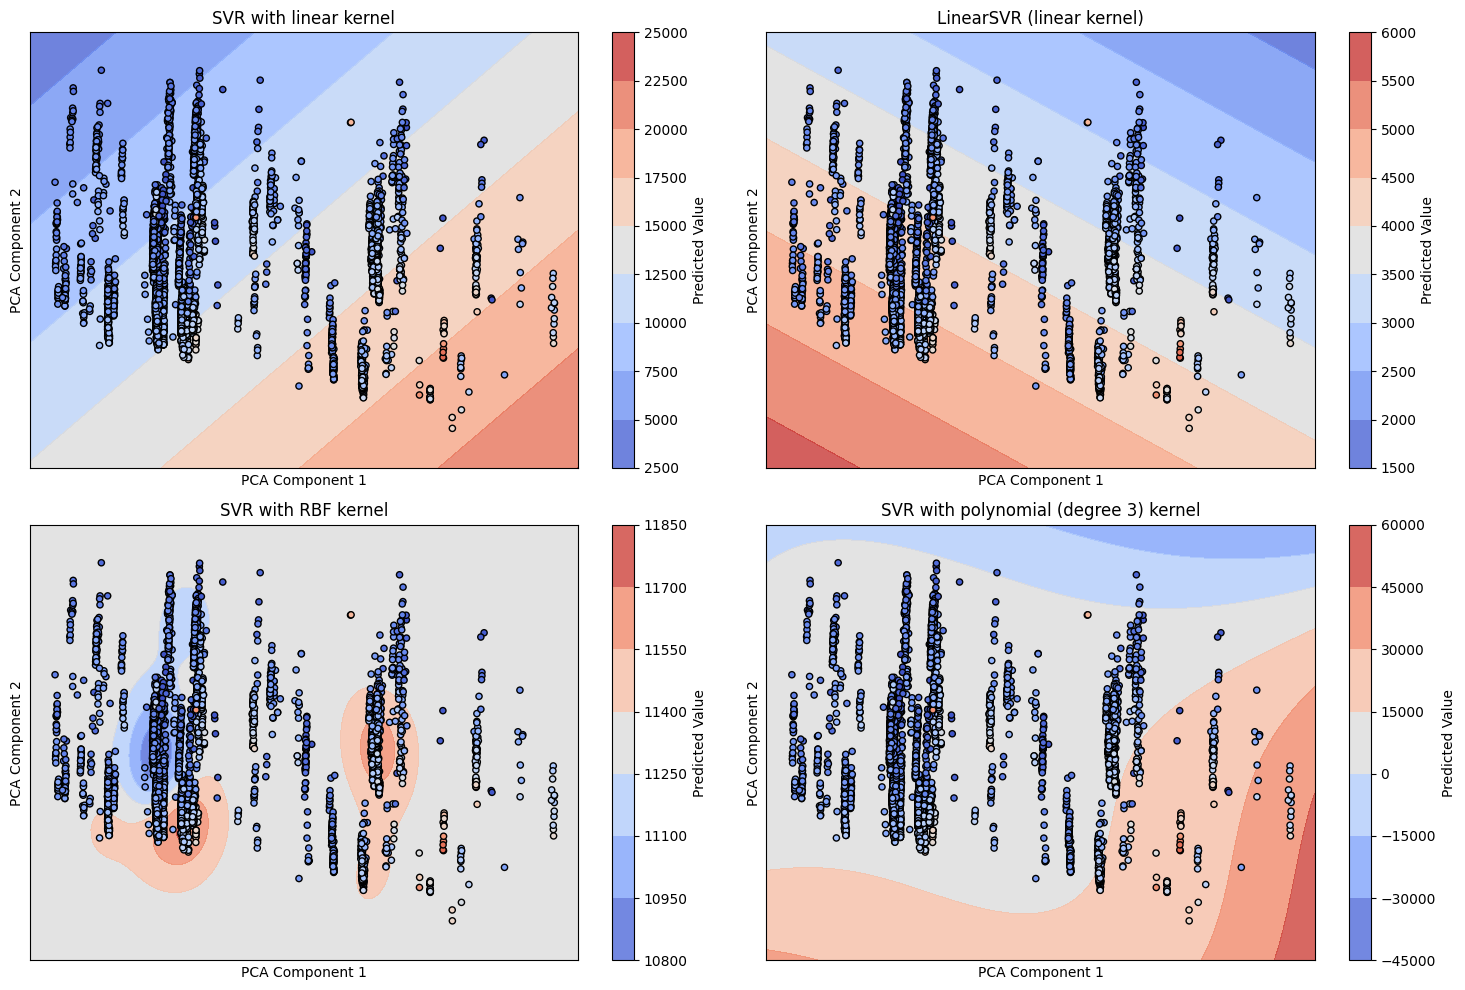

In [29]:
# Define SVR models
C = 1.0  # Regularization parameter
models = [
    SVR(kernel="linear", C=C),
    LinearSVR(C=C, max_iter=10000),
    SVR(kernel="rbf", gamma=0.7, C=C),
    SVR(kernel="poly", degree=3, gamma="auto", C=C),
]

# Fit the models on the 2D data
try:
    fitted_models = [clf.fit(x_train, y_train) for clf in models]
except Exception as e:
    print(f"Error fitting models: {e}")
    raise

# Titles for the plots
titles = (
    "SVR with linear kernel",
    "LinearSVR (linear kernel)",
    "SVR with RBF kernel",
    "SVR with polynomial (degree 3) kernel",
)

# Set up 2x2 grid for plotting
fig, sub = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot regression surfaces
for clf, title, ax in zip(fitted_models, titles, sub.flatten()):
    try:
        # Create a mesh grid for the regression surface
        x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
        y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        
        # Predict continuous values on the mesh grid
        Z = clf.predict(grid_points)
        Z = Z.reshape(xx.shape)

        # Plot the regression surface as a contour plot
        contour = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        fig.colorbar(contour, ax=ax, label='Predicted Value')
        
        # Scatter the training points (X0, X1 are the two columns of x_train_2d)
        X0, X1 = x_train[:, 0], x_train[:, 1]
        ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        ax.set_title(title)
    except Exception as e:
        print(f"Error plotting {title}: {e}")

plt.tight_layout()
plt.show()

### SVR in 3D

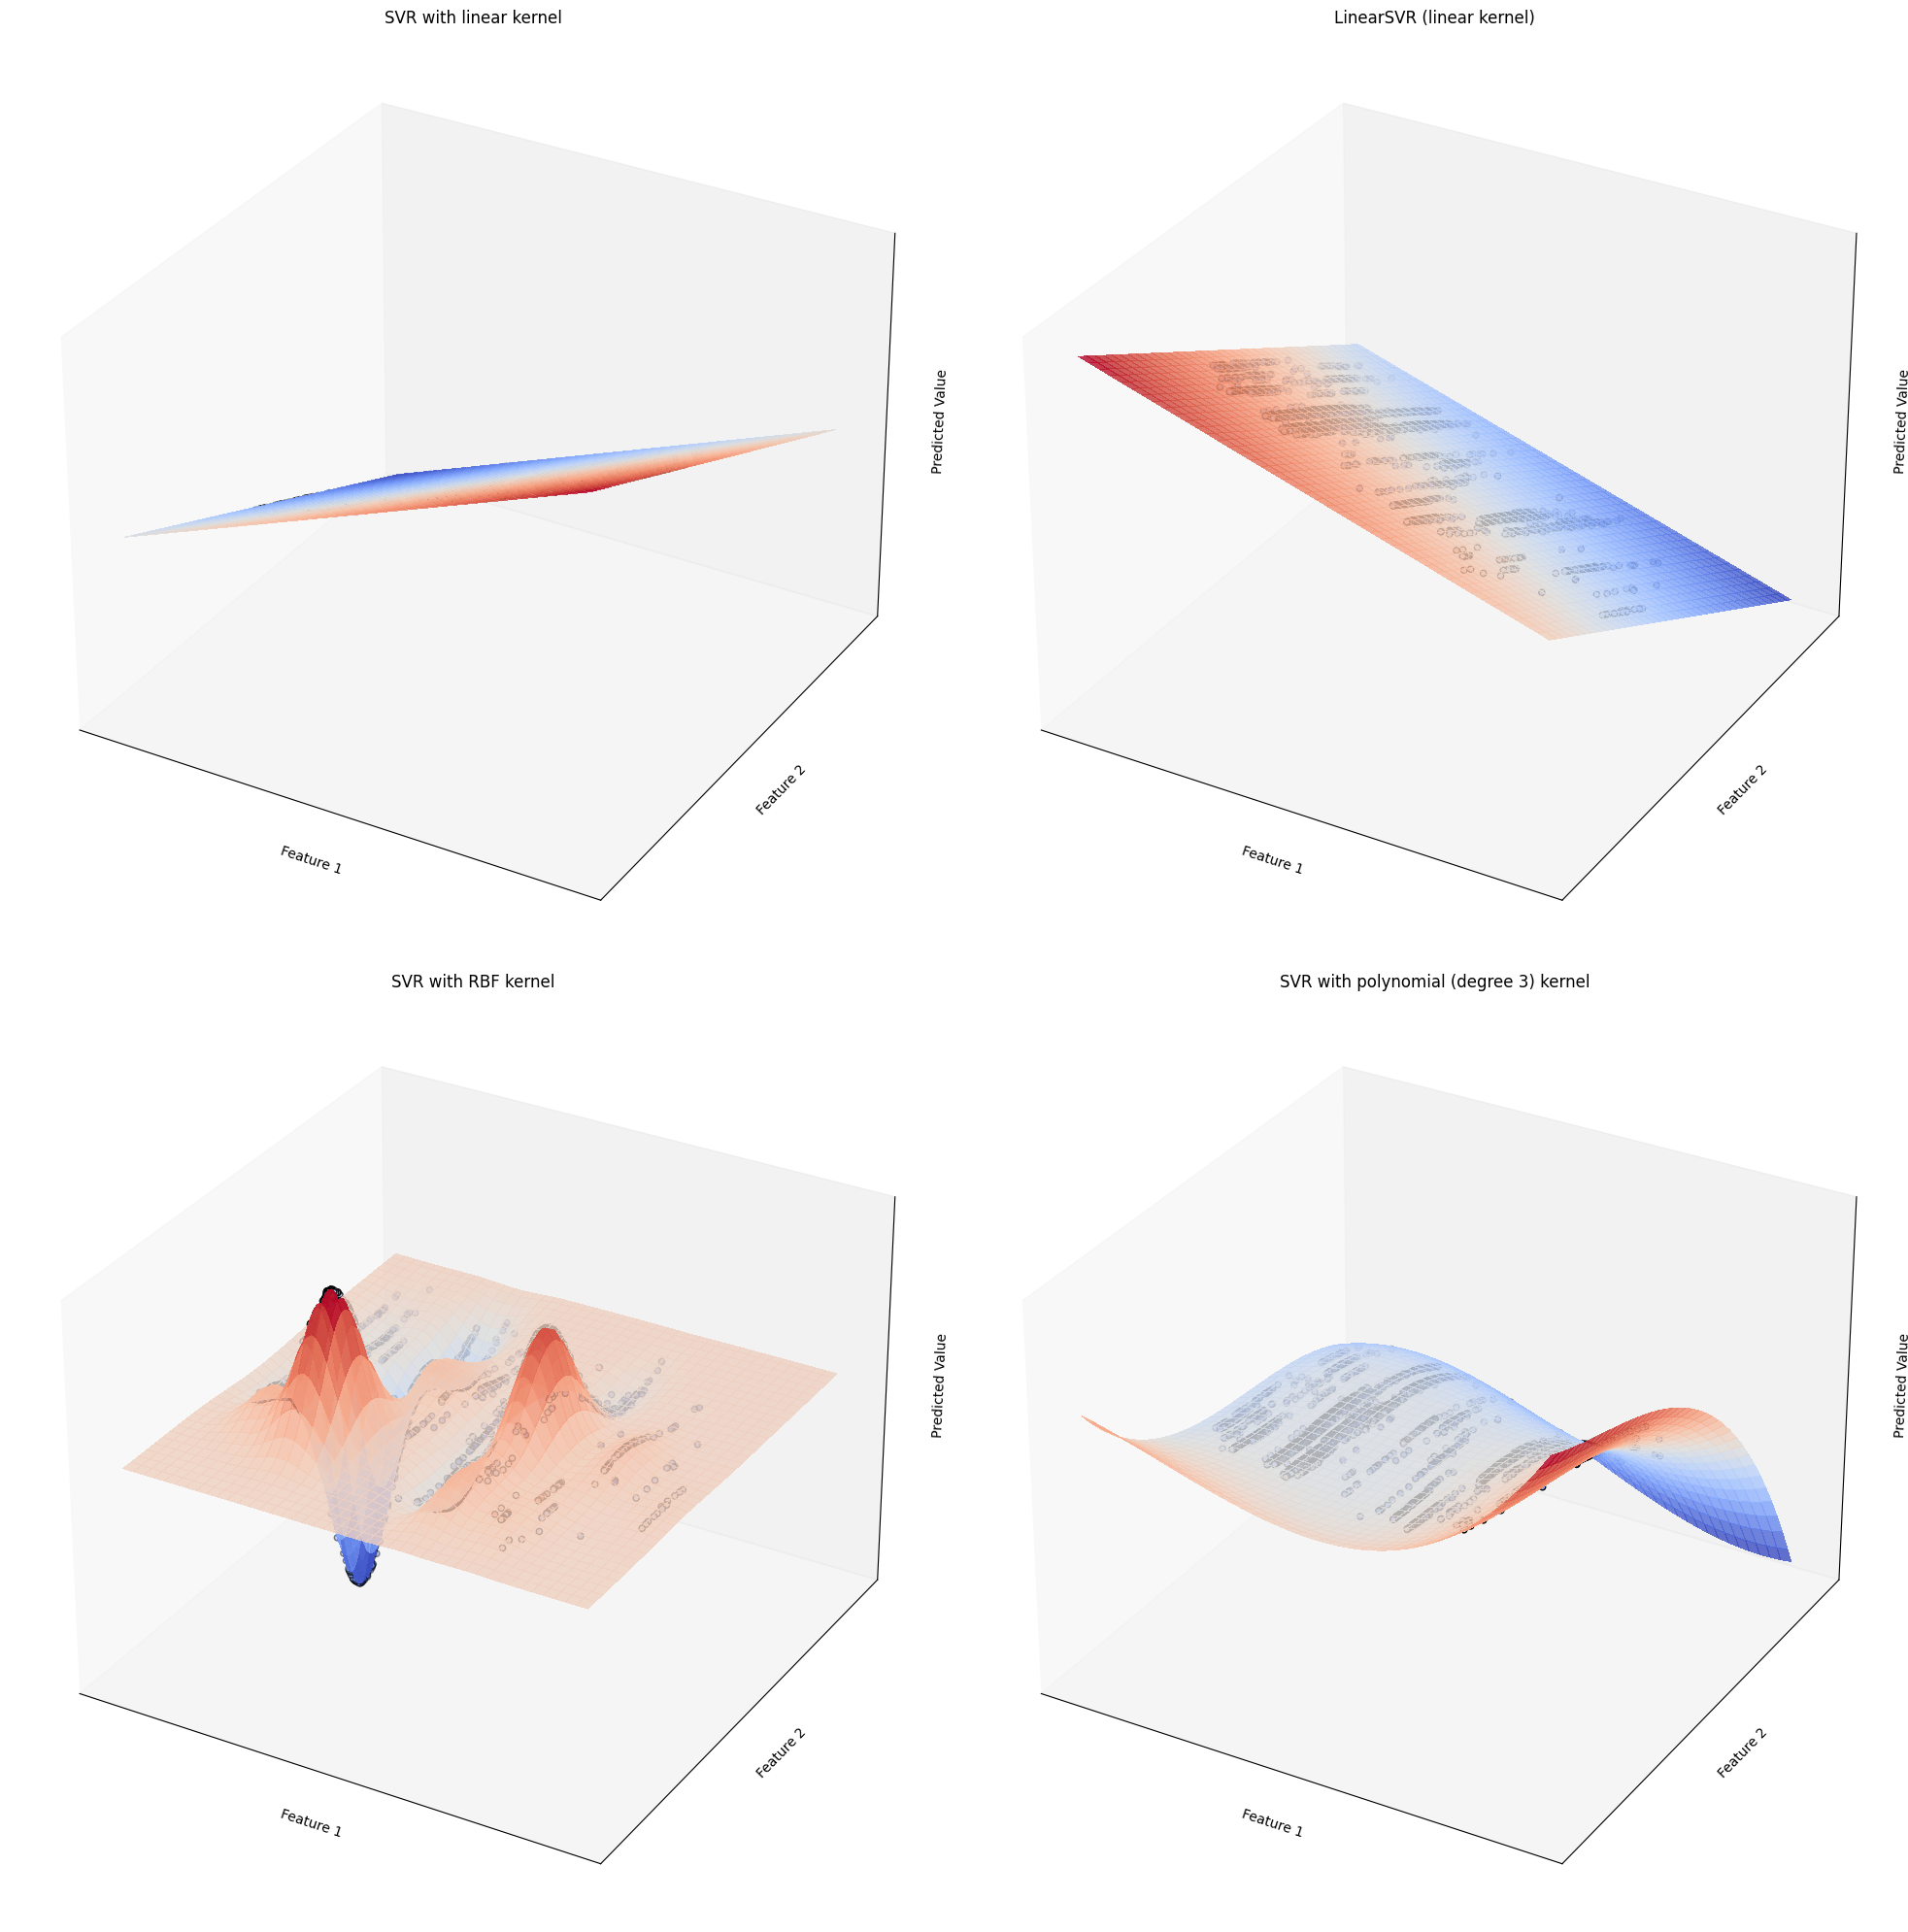

In [30]:
# Define SVR models
C = 1.0  # Regularization parameter
models = [
    SVR(kernel="linear", C=C),
    LinearSVR(C=C, max_iter=10000),
    SVR(kernel="rbf", gamma=0.7, C=C),
    SVR(kernel="poly", degree=3, gamma="auto", C=C),
]

# Fit the models on the 2D data
try:
    fitted_models = [clf.fit(x_train, y_train) for clf in models]
except Exception as e:
    print(f"Error fitting models: {e}")
    raise

# Titles for the plots
titles = (
    "SVR with linear kernel",
    "LinearSVR (linear kernel)",
    "SVR with RBF kernel",
    "SVR with polynomial (degree 3) kernel",
)

# Set up 2x2 grid for 3D plotting
fig = plt.figure(figsize=(20, 20))
axes = [fig.add_subplot(2, 2, i+1, projection='3d') for i in range(4)]

# Plot regression surfaces in 3D
for clf, title, ax in zip(fitted_models, titles, axes):
    try:
        # Create a mesh grid for the regression surface
        x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
        y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        
        # Predict continuous values on the mesh grid
        Z = clf.predict(grid_points)
        Z = Z.reshape(xx.shape)

        # Plot the regression surface in 3D
        surf = ax.plot_surface(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, linewidth=0, antialiased=False)

        # Scatter the training points with their predicted Z values
        X0, X1 = x_train[:, 0], x_train[:, 1]
        Z_train = clf.predict(x_train)
        scatter = ax.scatter(X0, X1, Z_train, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

        # Add labels and title
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Predicted Value')
        ax.set_title(title)

        # Remove tick labels for clarity
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

    except Exception as e:
        print(f"Error plotting {title}: {e}")

plt.tight_layout()
plt.show()

### NuSVR (2D)

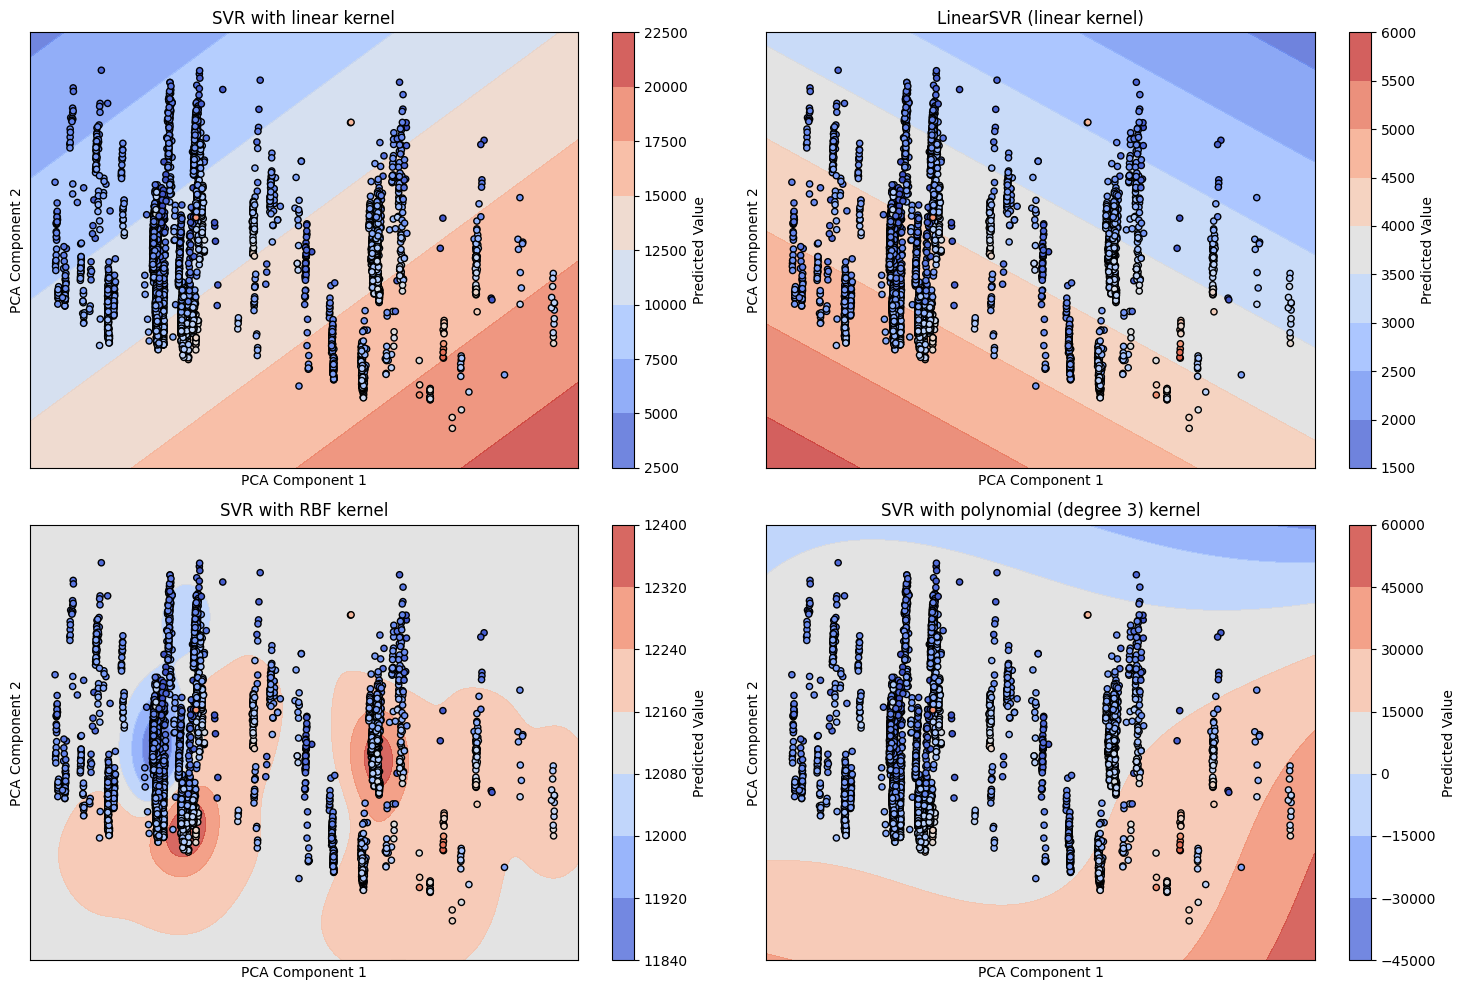

In [31]:
# Define SVR models
C = 1.0  # Regularization parameter
models = [
    NuSVR(kernel="linear", C=C),
    LinearSVR(C=C, max_iter=10000),
    NuSVR(kernel="rbf", gamma=0.7, C=C),
    NuSVR(kernel="poly", degree=3, gamma="auto", C=C),
]

# Fit the models on the 2D data
try:
    fitted_models = [clf.fit(x_train, y_train) for clf in models]
except Exception as e:
    print(f"Error fitting models: {e}")
    raise

# Titles for the plots
titles = (
    "SVR with linear kernel",
    "LinearSVR (linear kernel)",
    "SVR with RBF kernel",
    "SVR with polynomial (degree 3) kernel",
)

# Set up 2x2 grid for plotting
fig, sub = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot regression surfaces
for clf, title, ax in zip(fitted_models, titles, sub.flatten()):
    try:
        # Create a mesh grid for the regression surface
        x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
        y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        
        # Predict continuous values on the mesh grid
        Z = clf.predict(grid_points)
        Z = Z.reshape(xx.shape)

        # Plot the regression surface as a contour plot
        contour = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        fig.colorbar(contour, ax=ax, label='Predicted Value')
        
        # Scatter the training points (X0, X1 are the two columns of x_train_2d)
        X0, X1 = x_train[:, 0], x_train[:, 1]
        ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        ax.set_title(title)
    except Exception as e:
        print(f"Error plotting {title}: {e}")

plt.tight_layout()
plt.show()

### NuSVR (3D)

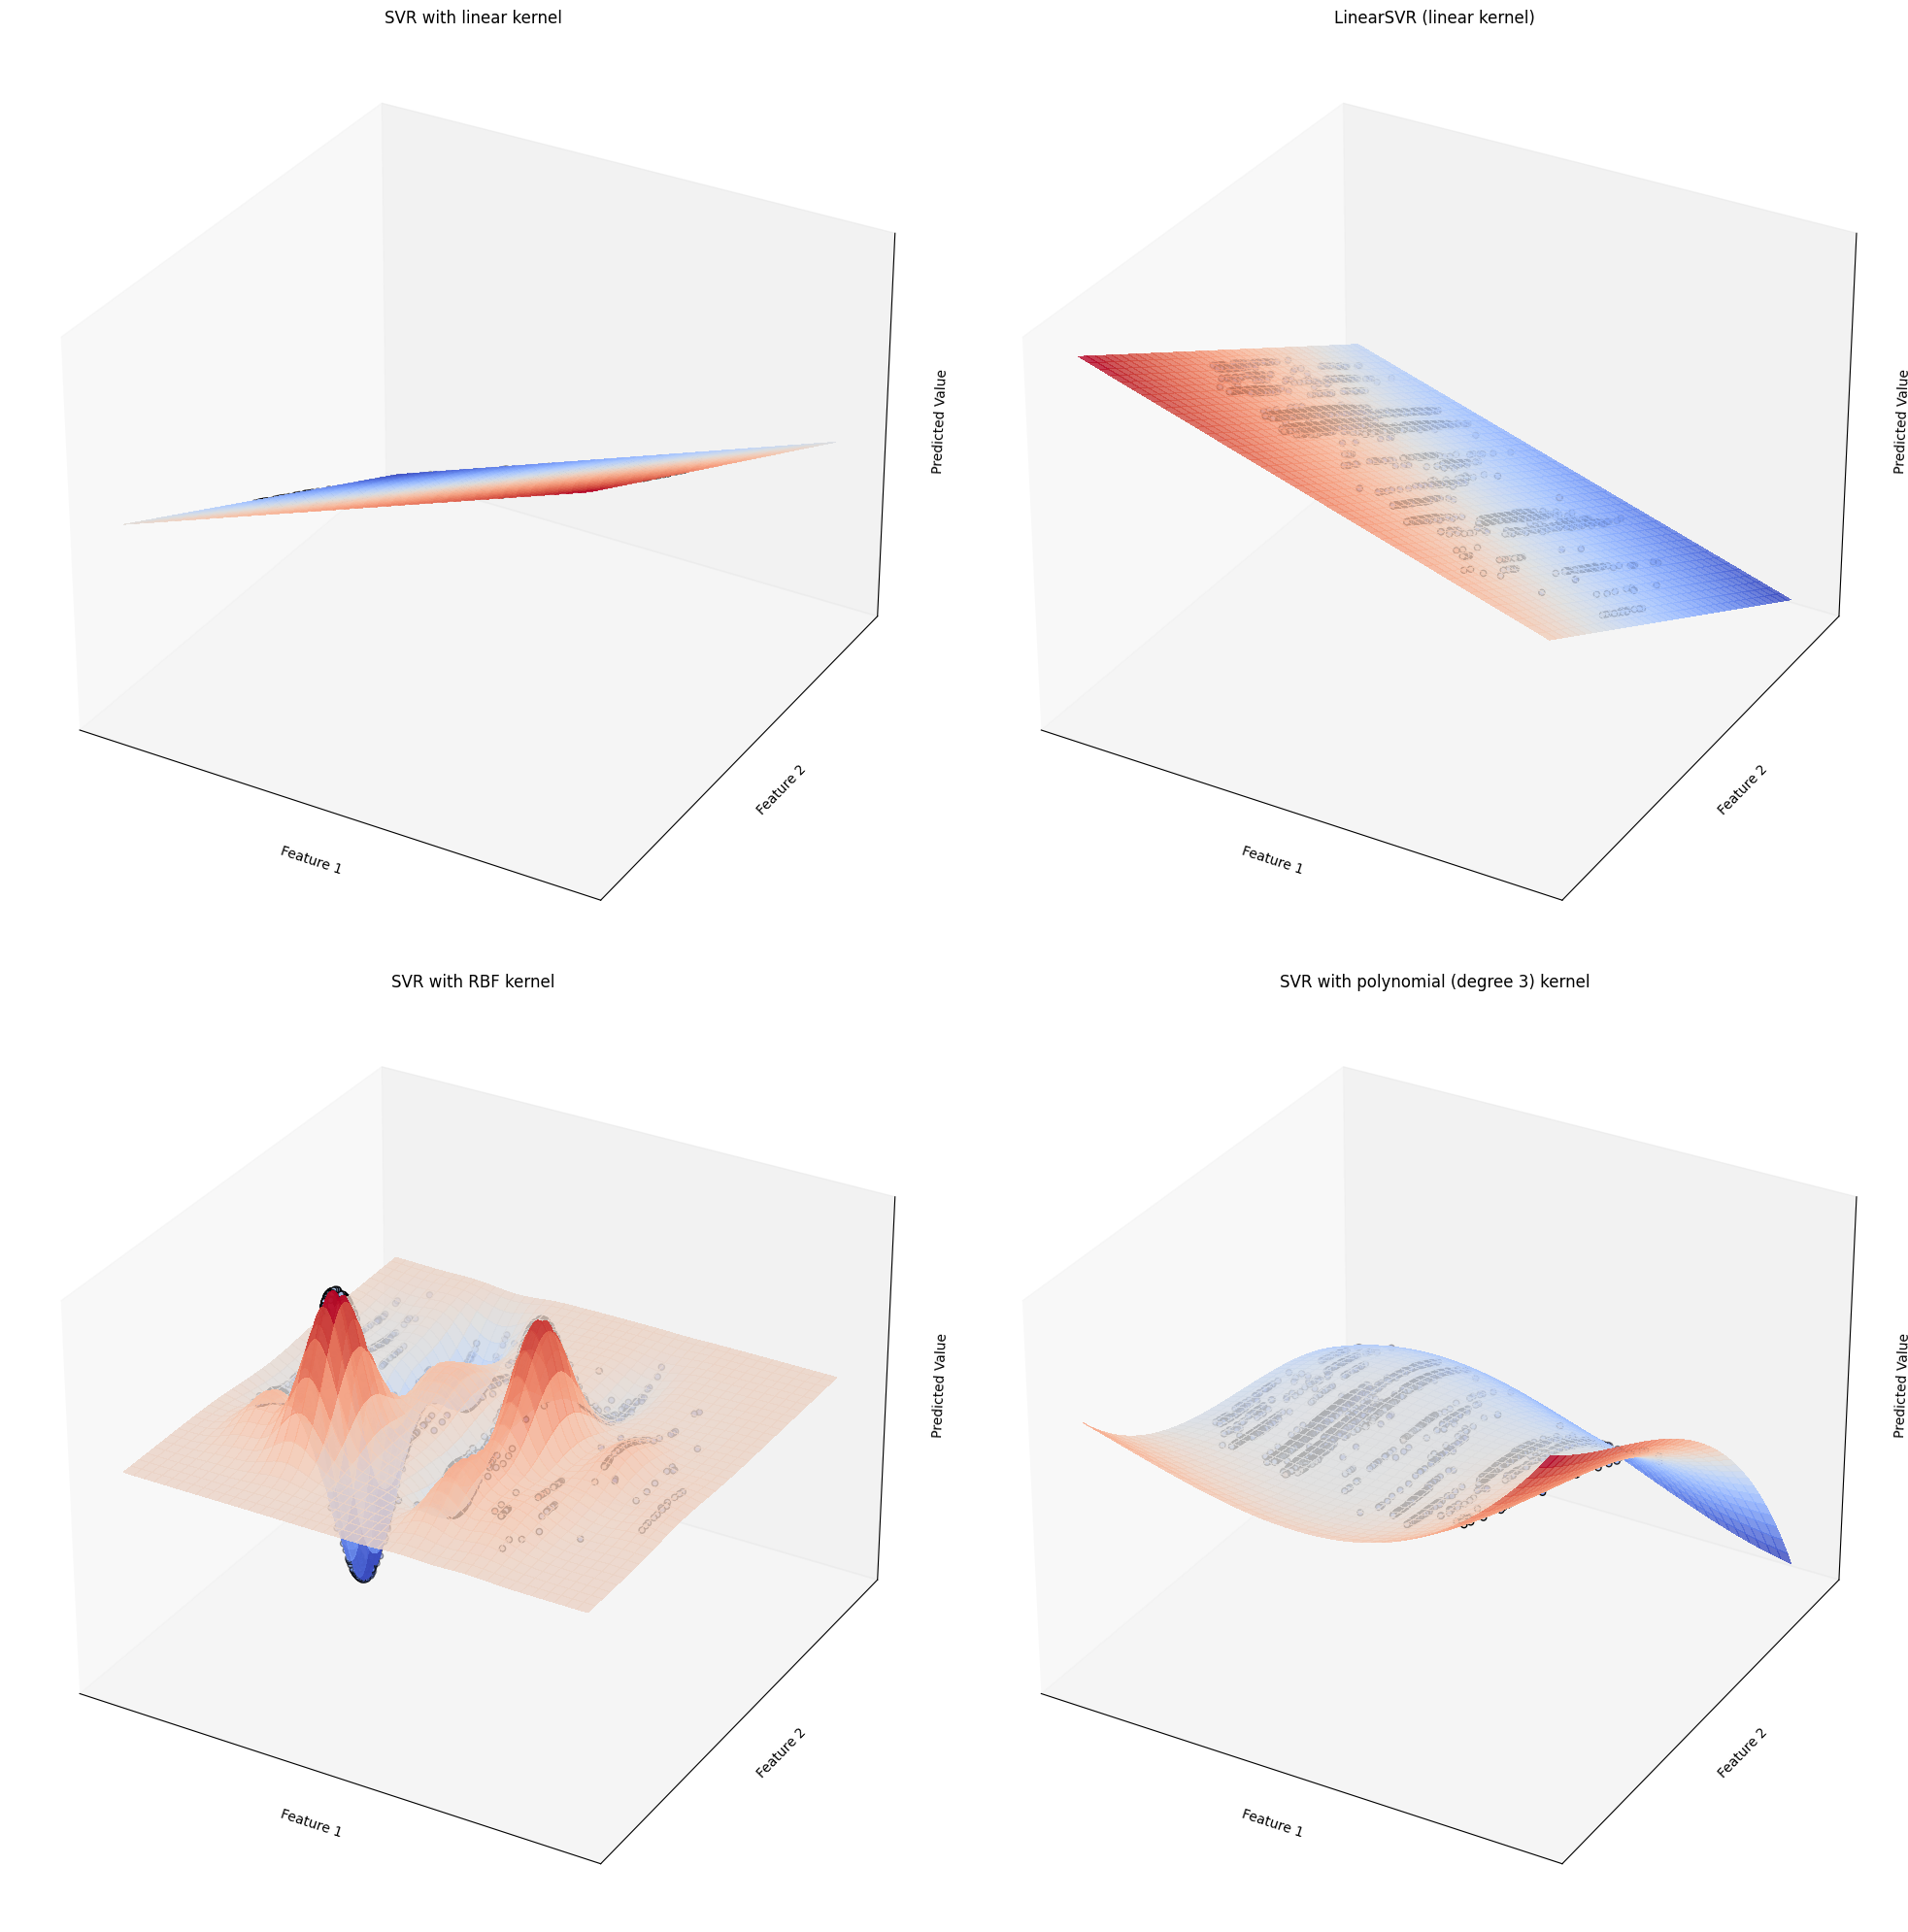

In [32]:
# Define SVR models
C = 1.0  # Regularization parameter
models = [
    NuSVR(kernel="linear", C=C),
    LinearSVR(C=C, max_iter=10000),
    NuSVR(kernel="rbf", gamma=0.7, C=C),
    NuSVR(kernel="poly", degree=3, gamma="auto", C=C),
]

# Fit the models on the 2D data
try:
    fitted_models = [clf.fit(x_train, y_train) for clf in models]
except Exception as e:
    print(f"Error fitting models: {e}")
    raise

# Titles for the plots
titles = (
    "SVR with linear kernel",
    "LinearSVR (linear kernel)",
    "SVR with RBF kernel",
    "SVR with polynomial (degree 3) kernel",
)

# Set up 2x2 grid for 3D plotting
fig = plt.figure(figsize=(20, 20))
axes = [fig.add_subplot(2, 2, i+1, projection='3d') for i in range(4)]

# Plot regression surfaces in 3D
for clf, title, ax in zip(fitted_models, titles, axes):
    try:
        # Create a mesh grid for the regression surface
        x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
        y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        
        # Predict continuous values on the mesh grid
        Z = clf.predict(grid_points)
        Z = Z.reshape(xx.shape)

        # Plot the regression surface in 3D
        surf = ax.plot_surface(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, linewidth=0, antialiased=False)

        # Scatter the training points with their predicted Z values
        X0, X1 = x_train[:, 0], x_train[:, 1]
        Z_train = clf.predict(x_train)
        scatter = ax.scatter(X0, X1, Z_train, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

        # Add labels and title
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Predicted Value')
        ax.set_title(title)

        # Remove tick labels for clarity
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

    except Exception as e:
        print(f"Error plotting {title}: {e}")

plt.tight_layout()
plt.show()

## SVM: Margin, support vectors, and seperating hyperplane (regression hypersurface)

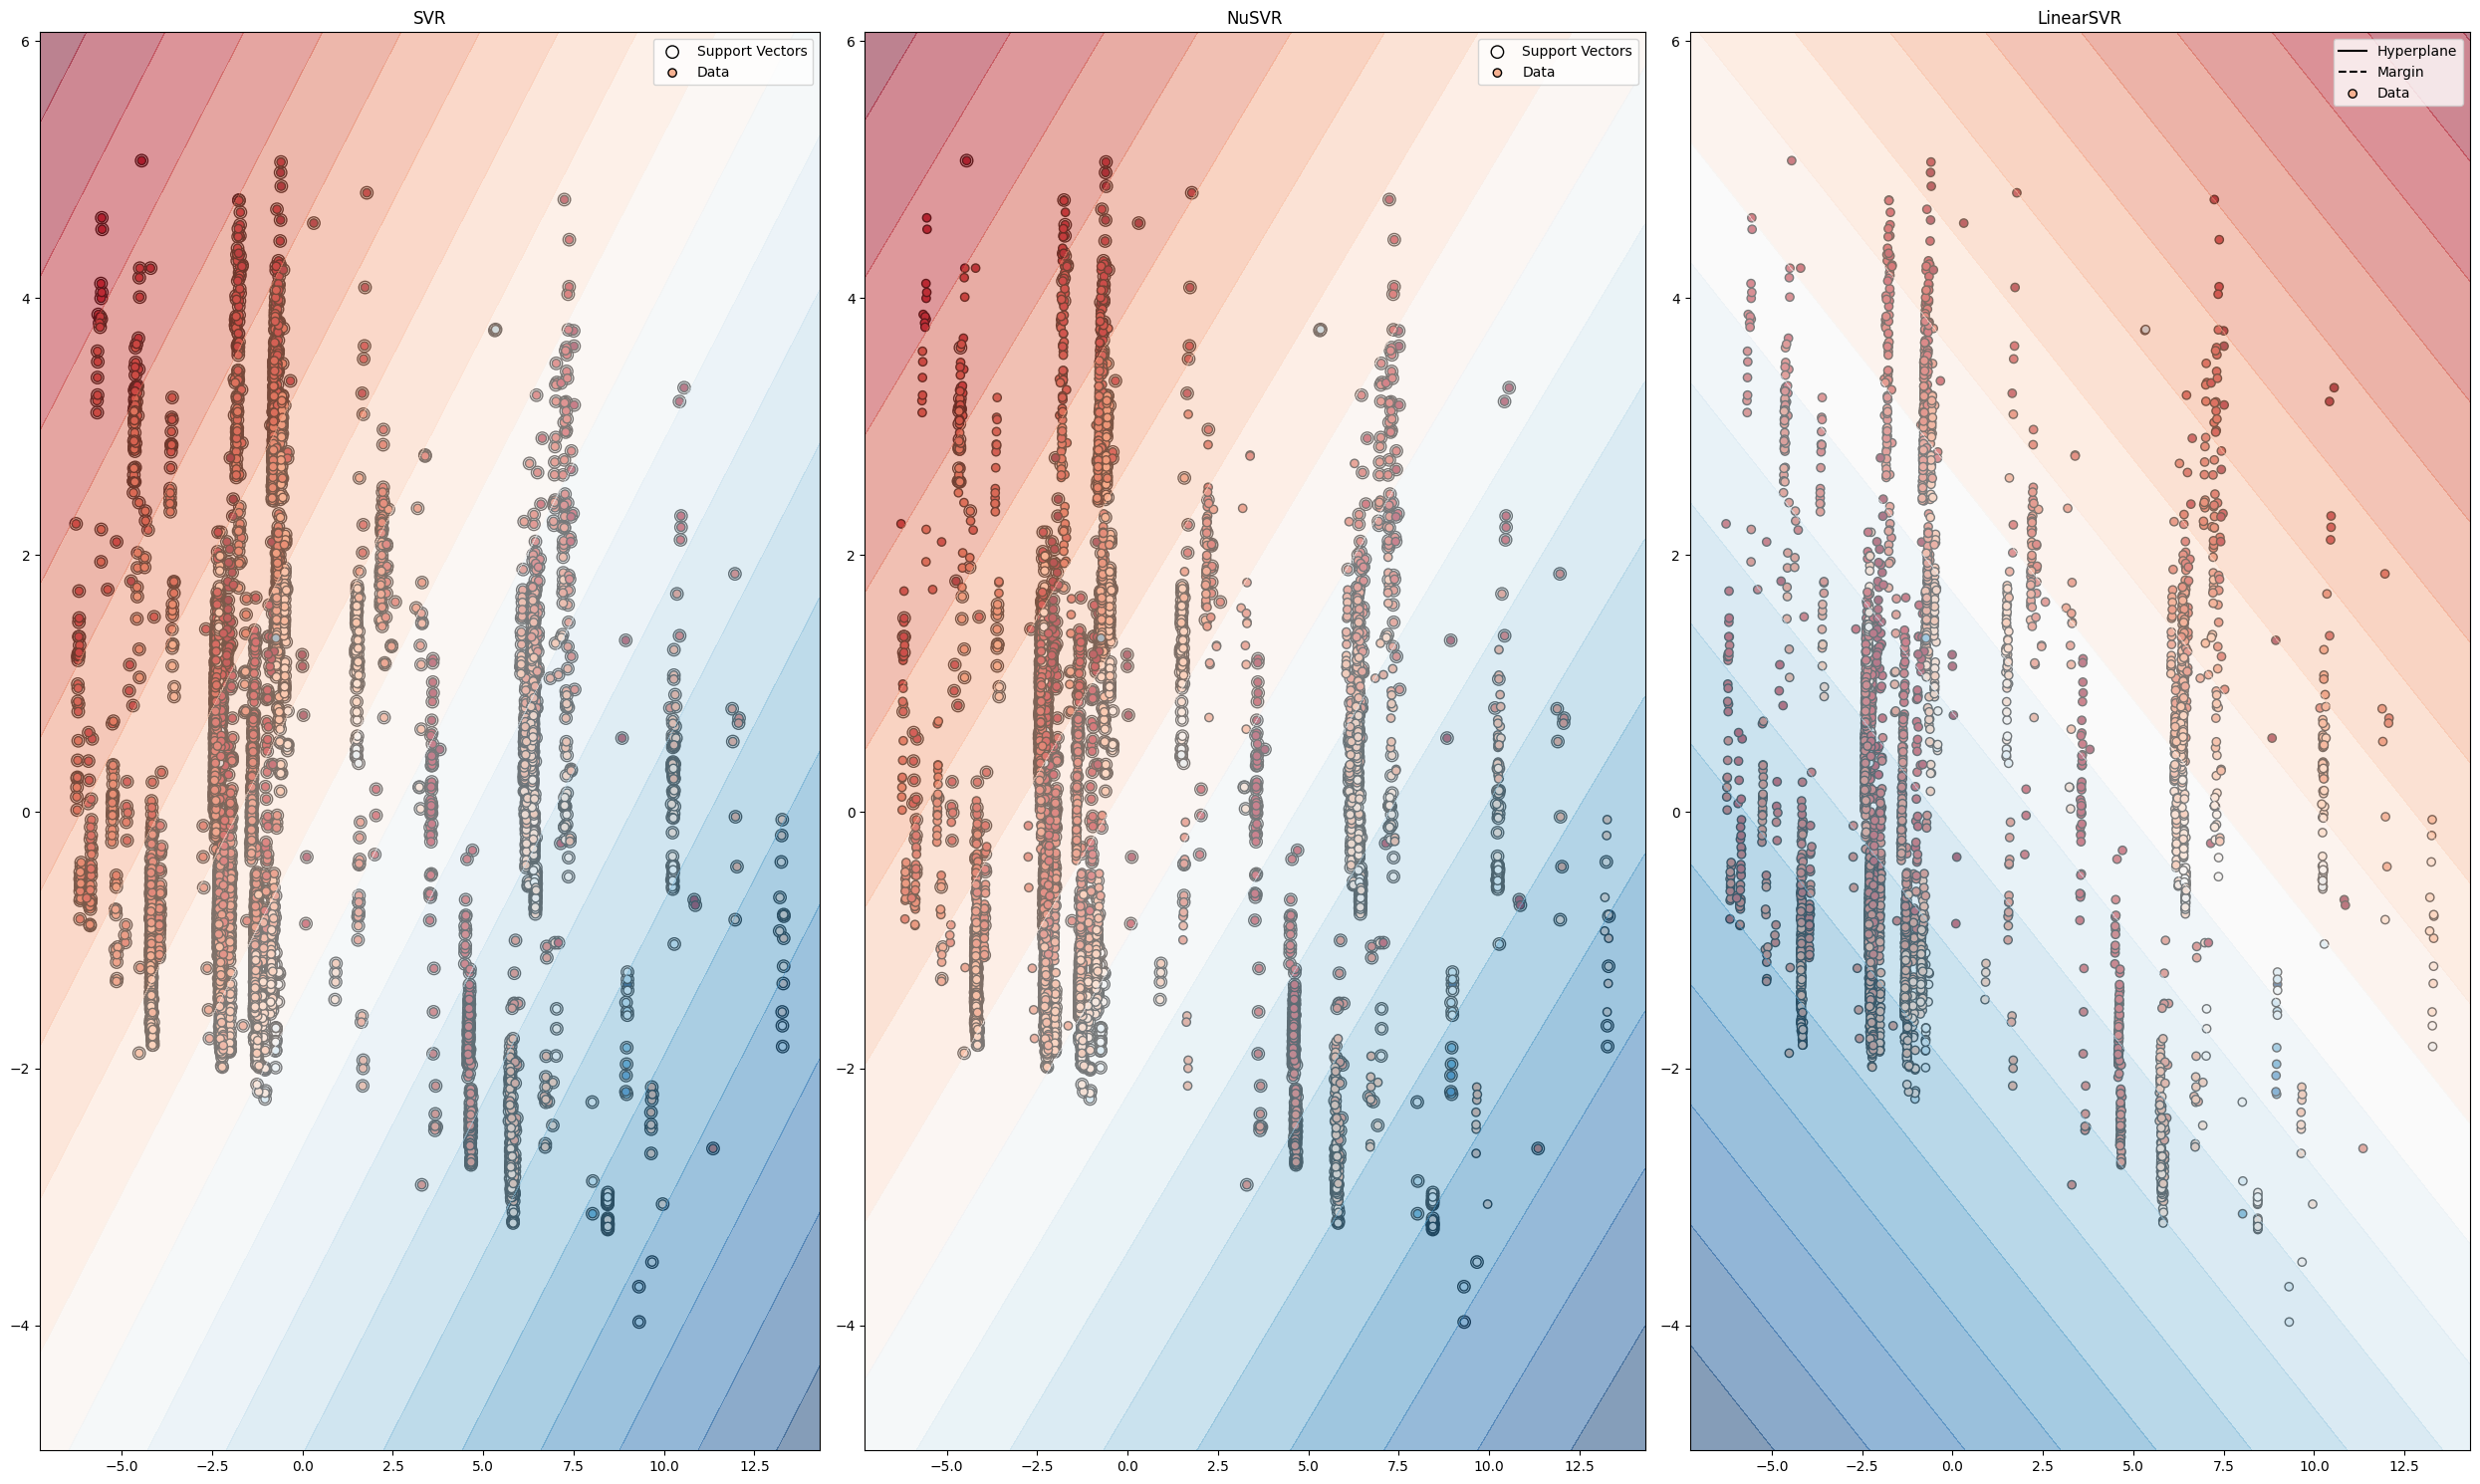

In [33]:
from sklearn import svm
# Define classifiers and parameters
classifiers = [
    ("SVR", svm.SVR(kernel="linear", C=1)),
    ("NuSVR", svm.NuSVR(kernel="linear", nu=0.5)),
    ("LinearSVR", svm.LinearSVR(C=1, max_iter=10000))
]

# Figure setup
fignum = 1
plt.figure(figsize=(25, 15))

for name, clf in classifiers:
    # Fit the model
    clf.fit(x_train, y_train)

    # Create the plot
    plt.subplot(1, 3, fignum)
    plt.title(name)

    # Compute and plot hyperplane and margins for LinearSVR
    if name == "LinearSVR":
        coef = clf.coef_  # 1D array (n_features,)
        intercept = clf.intercept_[0]
        w = coef
        if len(w) >= 2:  # At least 2D features
            a = -w[0] / w[1] if w[1] != 0 else 0  # Slope
            xx = np.linspace(x_train[:, 0].min() - 1, x_train[:, 0].max() + 1)
            yy = a * xx - (intercept / w[1] if w[1] != 0 else 0)
            margin = 1 / np.sqrt(np.sum(coef ** 2))
            yy_down = yy - np.sqrt(1 + a ** 2) * margin
            yy_up = yy + np.sqrt(1 + a ** 2) * margin
            # Plot only if values are finite
            if np.isfinite(yy).all() and np.isfinite(yy_down).all() and np.isfinite(yy_up).all():
                plt.plot(xx, yy, "k-", label="Hyperplane")
                plt.plot(xx, yy_down, "k--", label="Margin")
                plt.plot(xx, yy_up, "k--")
        elif len(w) == 1:  # 1D feature case
            xx = np.linspace(x_train[:, 0].min() - 1, x_train[:, 0].max() + 1)
            yy = np.full_like(xx, -intercept / w[0])
            if np.isfinite(yy).all():
                plt.plot(xx, yy, "k-", label="Hyperplane")

    # Plot support vectors (for SVR and NuSVR)
    if name in ["SVR", "NuSVR"]:
        plt.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=80,
            facecolors="none",
            edgecolors="k",
            label="Support Vectors"
        )

    # Plot the data points
    plt.scatter(
        x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.get_cmap("RdBu"),
        edgecolors="k", label="Data"
    )

    # Create mesh for prediction surface
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Get predicted values
    Z = clf.predict(xy).reshape(XX.shape)

    # Plot prediction contours
    plt.contourf(XX, YY, Z, cmap=plt.get_cmap("RdBu"), alpha=0.5, levels=20)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend()
    fignum += 1

plt.tight_layout()
plt.show()

## Hyperparameter Tuning

In [34]:
# Define the list of regression models
ml_models = [
    ("LinearSVR", LinearSVR(random_state=42)),
    ("NuSVR", NuSVR()),
    ("SVR", SVR())
]

def objective_linear_svr(trial):
    params = {
        'C': trial.suggest_float('C', 1e-2, 1e2, log=True),
        'epsilon': trial.suggest_float('epsilon', 1e-2, 1e1, log=True),
        'max_iter': trial.suggest_int('max_iter', 1000, 10000)
    }
    model = LinearSVR(**params, random_state=42)
    mse_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return mse_scores.mean()

def objective_nusvr(trial):
    params = {
        'nu': trial.suggest_float('nu', 0.1, 0.9),
        'C': trial.suggest_float('C', 1e-2, 1e2, log=True)
    }
    model = NuSVR(**params)
    mse_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return mse_scores.mean()

def objective_svr(trial):
    params = {
        'C': trial.suggest_float('C', 1e-2, 1e2, log=True),
        'epsilon': trial.suggest_float('epsilon', 1e-2, 1e1, log=True),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
        'degree': trial.suggest_int('degree', 2, 5) if trial.params['kernel'] == 'poly' else 2,
        'gamma': trial.suggest_categorical('gamma', ['auto', 'scale', 1e-2, 1e-1, 1])
    }
    model = SVR(**params)
    mse_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return mse_scores.mean()

# Perform hyperparameter tuning for each model
for name, _ in ml_models:
    print(f"\nTuning {name}...")
    study = optuna.create_study(direction='maximize')  # Maximize negative MSE (minimize MSE)
    if name == "LinearSVR":
        study.optimize(objective_linear_svr, n_trials=20)
    elif name == "NuSVR":
        study.optimize(objective_nusvr, n_trials=20)
    elif name == "SVR":
        study.optimize(objective_svr, n_trials=20)

    best_params = study.best_params
    best_model = eval(name)(**best_params) if name == "LinearSVR" else eval(name)(**best_params)
    best_model.fit(x_train, y_train)

    # Evaluate with multiple metrics
    mse_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='r2')

    print(f"Best parameters for {name}: {best_params}")
    print(f"\tCross-Validation (Negative Mean Squared Error): {mse_scores}")
    print(f"\tAverage Cross-Validation (Negative Mean Squared Error): {mse_scores.mean():.4f}")
    print(f"\tCross-Validation (Negative Mean Absolute Error): {mae_scores}")
    print(f"\tAverage Cross-Validation (Negative Mean Absolute Error): {mae_scores.mean():.4f}")
    print(f"\tCross-Validation (R-squared): {r2_scores}")
    print(f"\tAverage Cross-Validation (R-squared): {r2_scores.mean():.4f}")
    print('-' * 100)

[I 2025-07-22 15:36:08,927] A new study created in memory with name: no-name-341e1e3d-1672-4438-a296-c38cf294123a
[I 2025-07-22 15:36:08,946] Trial 0 finished with value: -172478781.38285697 and parameters: {'C': 0.016830032050310813, 'epsilon': 0.2095831781842278, 'max_iter': 8156}. Best is trial 0 with value: -172478781.38285697.
[I 2025-07-22 15:36:08,979] Trial 1 finished with value: -17427614.87431124 and parameters: {'C': 94.22740798653723, 'epsilon': 5.5045466810732435, 'max_iter': 9809}. Best is trial 1 with value: -17427614.87431124.
[I 2025-07-22 15:36:09,007] Trial 2 finished with value: -17649736.262129527 and parameters: {'C': 43.940878445334334, 'epsilon': 0.36386808515504276, 'max_iter': 5372}. Best is trial 1 with value: -17427614.87431124.
[I 2025-07-22 15:36:09,025] Trial 3 finished with value: -47006900.118752606 and parameters: {'C': 2.518189294187199, 'epsilon': 2.3432886633400036, 'max_iter': 7762}. Best is trial 1 with value: -17427614.87431124.
[I 2025-07-22 15:


Tuning LinearSVR...


[I 2025-07-22 15:36:09,148] Trial 9 finished with value: -21385000.02212339 and parameters: {'C': 7.1761008058420925, 'epsilon': 0.020460397661125493, 'max_iter': 9372}. Best is trial 1 with value: -17427614.87431124.
[I 2025-07-22 15:36:09,182] Trial 10 finished with value: -129115633.94747849 and parameters: {'C': 0.584872585187021, 'epsilon': 9.203860090734809, 'max_iter': 7216}. Best is trial 1 with value: -17427614.87431124.
[I 2025-07-22 15:36:09,229] Trial 11 finished with value: -17438797.56587671 and parameters: {'C': 98.55252995847806, 'epsilon': 0.13097920614569958, 'max_iter': 5003}. Best is trial 1 with value: -17427614.87431124.
[I 2025-07-22 15:36:09,276] Trial 12 finished with value: -17469134.63037134 and parameters: {'C': 86.08157026989115, 'epsilon': 0.07824515736405077, 'max_iter': 4262}. Best is trial 1 with value: -17427614.87431124.
[I 2025-07-22 15:36:09,323] Trial 13 finished with value: -17440641.223641366 and parameters: {'C': 84.59729897574147, 'epsilon': 1.

Best parameters for LinearSVR: {'C': 94.22740798653723, 'epsilon': 5.5045466810732435, 'max_iter': 9809}
	Cross-Validation (Negative Mean Squared Error): [-18118644.82867762 -16557740.42895538 -19293263.2514018
 -18062310.24320005 -15186186.30348227]
	Average Cross-Validation (Negative Mean Squared Error): -17443629.0111
	Cross-Validation (Negative Mean Absolute Error): [-3024.80692609 -2943.86150287 -3112.23979991 -3021.86996709
 -2848.25132924]
	Average Cross-Validation (Negative Mean Absolute Error): -2990.2059
	Cross-Validation (R-squared): [0.21915602 0.24850333 0.29151157 0.20598419 0.21773113]
	Average Cross-Validation (R-squared): 0.2366
----------------------------------------------------------------------------------------------------

Tuning NuSVR...


[I 2025-07-22 15:36:12,623] Trial 0 finished with value: -16833938.620511 and parameters: {'nu': 0.654520263278927, 'C': 33.86659345922525}. Best is trial 0 with value: -16833938.620511.
[I 2025-07-22 15:36:14,057] Trial 1 finished with value: -16356194.048693502 and parameters: {'nu': 0.23773552799252393, 'C': 94.58960807088793}. Best is trial 1 with value: -16356194.048693502.
[I 2025-07-22 15:36:15,189] Trial 2 finished with value: -23317265.402320467 and parameters: {'nu': 0.1585879317957499, 'C': 0.01000053245339566}. Best is trial 1 with value: -16356194.048693502.
[I 2025-07-22 15:36:18,268] Trial 3 finished with value: -19131526.54101805 and parameters: {'nu': 0.7383929265493695, 'C': 11.016622234595115}. Best is trial 1 with value: -16356194.048693502.
[I 2025-07-22 15:36:21,003] Trial 4 finished with value: -22694949.033370964 and parameters: {'nu': 0.6039439135648887, 'C': 0.6490621929805309}. Best is trial 1 with value: -16356194.048693502.
[I 2025-07-22 15:36:23,766] Trial

Best parameters for NuSVR: {'nu': 0.383395653800413, 'C': 84.01620857081457}
	Cross-Validation (Negative Mean Squared Error): [-15800227.89117824 -14382553.47819032 -17802265.01950211
 -15799851.25459564 -13037574.8368976 ]
	Average Cross-Validation (Negative Mean Squared Error): -15364494.4961
	Cross-Validation (Negative Mean Absolute Error): [-2896.81927029 -2761.39339835 -3001.9052246  -2872.69732946
 -2722.1217917 ]
	Average Cross-Validation (Negative Mean Absolute Error): -2850.9874
	Cross-Validation (R-squared): [0.31864907 0.34661221 0.3456168  0.30521867 0.32859644]
	Average Cross-Validation (R-squared): 0.3289
----------------------------------------------------------------------------------------------------

Tuning SVR...


[I 2025-07-22 15:37:03,369] Trial 0 finished with value: -17282224.237678707 and parameters: {'C': 42.23492176117114, 'epsilon': 6.2929996711858465, 'kernel': 'linear', 'gamma': 0.01}. Best is trial 0 with value: -17282224.237678707.
[I 2025-07-22 15:37:06,777] Trial 1 finished with value: -23881686.6271859 and parameters: {'C': 0.12592104108800728, 'epsilon': 0.13917325702681546, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 0 with value: -17282224.237678707.
[I 2025-07-22 15:37:09,106] Trial 2 finished with value: -22765523.084736086 and parameters: {'C': 0.022680432651824227, 'epsilon': 0.9015978323032515, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 0 with value: -17282224.237678707.
[I 2025-07-22 15:37:12,398] Trial 3 finished with value: -23951053.851653453 and parameters: {'C': 0.07525939618505902, 'epsilon': 0.14646067310016794, 'kernel': 'rbf', 'gamma': 0.01}. Best is trial 0 with value: -17282224.237678707.
[I 2025-07-22 15:37:16,511] Trial 4 finished with value: -2

Best parameters for SVR: {'C': 46.2077657808523, 'epsilon': 2.585594185586997, 'kernel': 'rbf', 'gamma': 0.1}
	Cross-Validation (Negative Mean Squared Error): [-15257729.32323569 -13982053.686716   -17942812.4262354
 -15281343.47117659 -12242083.86312271]
	Average Cross-Validation (Negative Mean Squared Error): -14941204.5541
	Cross-Validation (Negative Mean Absolute Error): [-2670.60905852 -2563.02122152 -2839.49301436 -2656.25535262
 -2474.9437234 ]
	Average Cross-Validation (Negative Mean Absolute Error): -2640.8645
	Cross-Validation (R-squared): [0.34204316 0.36480659 0.34045049 0.32801949 0.3695623 ]
	Average Cross-Validation (R-squared): 0.3490
----------------------------------------------------------------------------------------------------


## Regression Hypersurface of the best model (2D)

Text(0, 0.5, 'Feature 2')

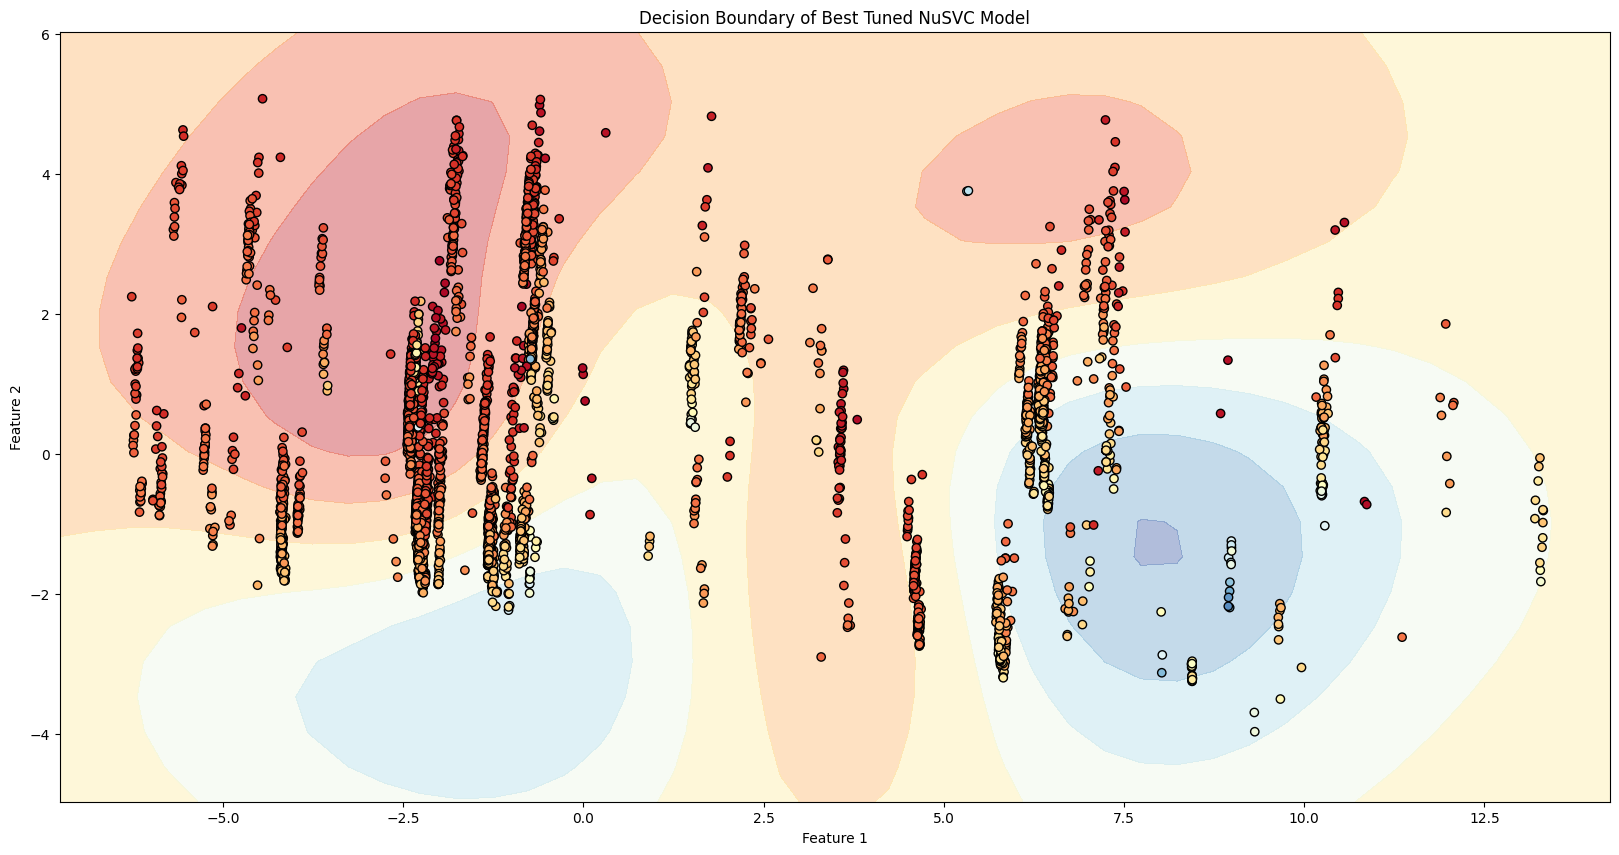

In [35]:
best_model.fit(x_train, y_train)

# Create a mesh grid with larger step size to reduce memory usage
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
step_size = 0.5  # Increased from 0.1 to 0.5 to reduce grid points
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Predict on the mesh grid in one step to avoid redundant copies
grid_points = np.stack([xx.ravel(), yy.ravel()], axis=1)  # More memory-efficient than np.c_
Z = best_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(20, 10))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.title('Decision Boundary of Best Tuned NuSVC Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## Regression Hypersurface of the best model (3D)

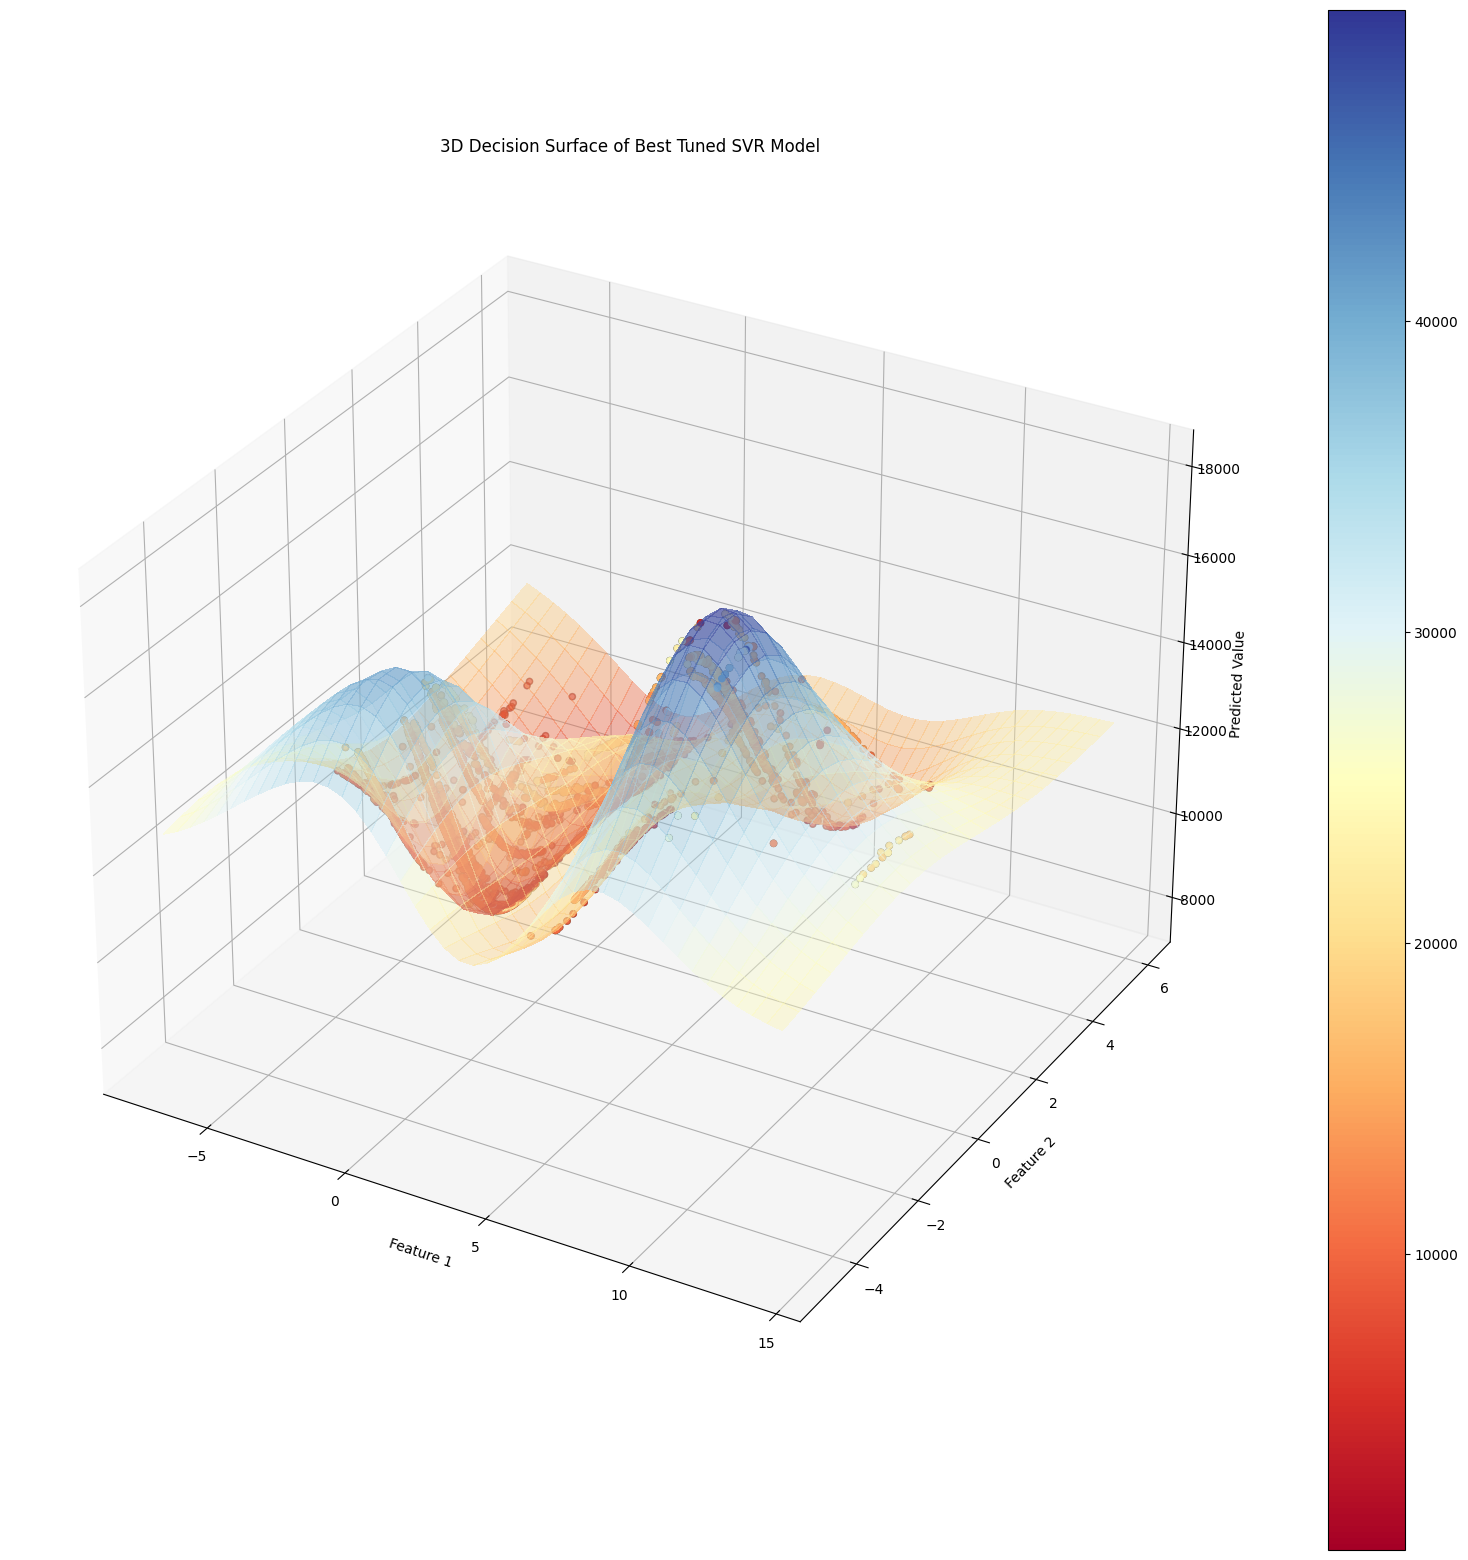

In [36]:
# Create a mesh grid with larger step size to reduce memory usage
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
step_size = 0.5  # Increased from 0.1 to 0.5 to reduce grid points
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Predict on the mesh grid in one step to avoid redundant copies
grid_points = np.stack([xx.ravel(), yy.ravel()], axis=1)
Z = best_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Create 3D plot
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision surface
surf = ax.plot_surface(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.4, linewidth=0, antialiased=False)

# Predict Z values for training data to scatter
Z_train = best_model.predict(x_train)
ax.scatter(x_train[:, 0], x_train[:, 1], Z_train, c=y_train, cmap=plt.cm.RdYlBu, edgecolors='k')

# Add labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted Value')
ax.set_title('3D Decision Surface of Best Tuned SVR Model')

# Add a color bar for the scatter points
plt.colorbar(ax.scatter(x_train[:, 0], x_train[:, 1], Z_train, c=y_train, cmap=plt.cm.RdYlBu))

plt.show()

# Model Evaluation

## Evaluate the model on train and test (Compared performance of the model)

In [37]:
mse_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='r2')
print("\nCross-Validation for Best Model on train dataset:")
print("\tCross-Validation (Negative Mean Squared Error):", mse_scores)
print(f'\tAverage Cross-Validation (Negative Mean Squared Error): {mse_scores.mean():.4f}')
print("\tCross-Validation (Negative Mean Absolute Error):", mae_scores)
print(f'\tAverage Cross-Validation (Negative Mean Absolute Error): {mae_scores.mean():.4f}')
print("\tCross-Validation (R-squared):", r2_scores)
print(f'\tAverage Cross-Validation (R-squared): {r2_scores.mean():.4f}')
print('-' * 100)

mse_scores = cross_val_score(best_model, x_test, y_test, cv=5, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(best_model, x_test, y_test, cv=5, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(best_model, x_test, y_test, cv=5, scoring='r2')
print("\nCross-Validation for Best Model on test dataset:")
print("\tCross-Validation (Negative Mean Squared Error):", mse_scores)
print(f'\tAverage Cross-Validation (Negative Mean Squared Error): {mse_scores.mean():.4f}')
print("\tCross-Validation (Negative Mean Absolute Error):", mae_scores)
print(f'\tAverage Cross-Validation (Negative Mean Absolute Error): {mae_scores.mean():.4f}')
print("\tCross-Validation (R-squared):", r2_scores)
print(f'\tAverage Cross-Validation (R-squared): {r2_scores.mean():.4f}')
print('-' * 100)


Cross-Validation for Best Model on train dataset:
	Cross-Validation (Negative Mean Squared Error): [-15257729.32323569 -13982053.686716   -17942812.4262354
 -15281343.47117659 -12242083.86312271]
	Average Cross-Validation (Negative Mean Squared Error): -14941204.5541
	Cross-Validation (Negative Mean Absolute Error): [-2670.60905852 -2563.02122152 -2839.49301436 -2656.25535262
 -2474.9437234 ]
	Average Cross-Validation (Negative Mean Absolute Error): -2640.8645
	Cross-Validation (R-squared): [0.34204316 0.36480659 0.34045049 0.32801949 0.3695623 ]
	Average Cross-Validation (R-squared): 0.3490
----------------------------------------------------------------------------------------------------

Cross-Validation for Best Model on test dataset:
	Cross-Validation (Negative Mean Squared Error): [-16146755.21558827 -20093625.6391751  -20570513.7764527
 -14120456.83418037 -19365384.46348966]
	Average Cross-Validation (Negative Mean Squared Error): -18059347.1858
	Cross-Validation (Negative Mea

##  Mean Squared Error, Mean Absolute Error, R-square on test dataset

In [38]:
# Make predictions
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)

# Evaluate the model
def evaluate_regression(y_true, y_pred, dataset_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{dataset_name} Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")
    return r2, mae, mse, rmse

# Evaluate on training and test sets
evaluate_regression(y_train, y_train_pred, "Training Set")
evaluate_regression(y_test, y_test_pred, "Test Set")

Training Set Metrics:
R² Score: 0.3818
Mean Absolute Error (MAE): 2553.0891
Mean Squared Error (MSE): 14203585.4733
Root Mean Squared Error (RMSE): 3768.7644

Test Set Metrics:
R² Score: 0.3620
Mean Absolute Error (MAE): 2466.3975
Mean Squared Error (MSE): 13948832.5677
Root Mean Squared Error (RMSE): 3734.8136



(0.36201749819621043,
 2466.3974659865835,
 13948832.567673704,
 3734.8135920918066)

## SVM: Margin, support vectors, and seperating hyperplane on test dataset

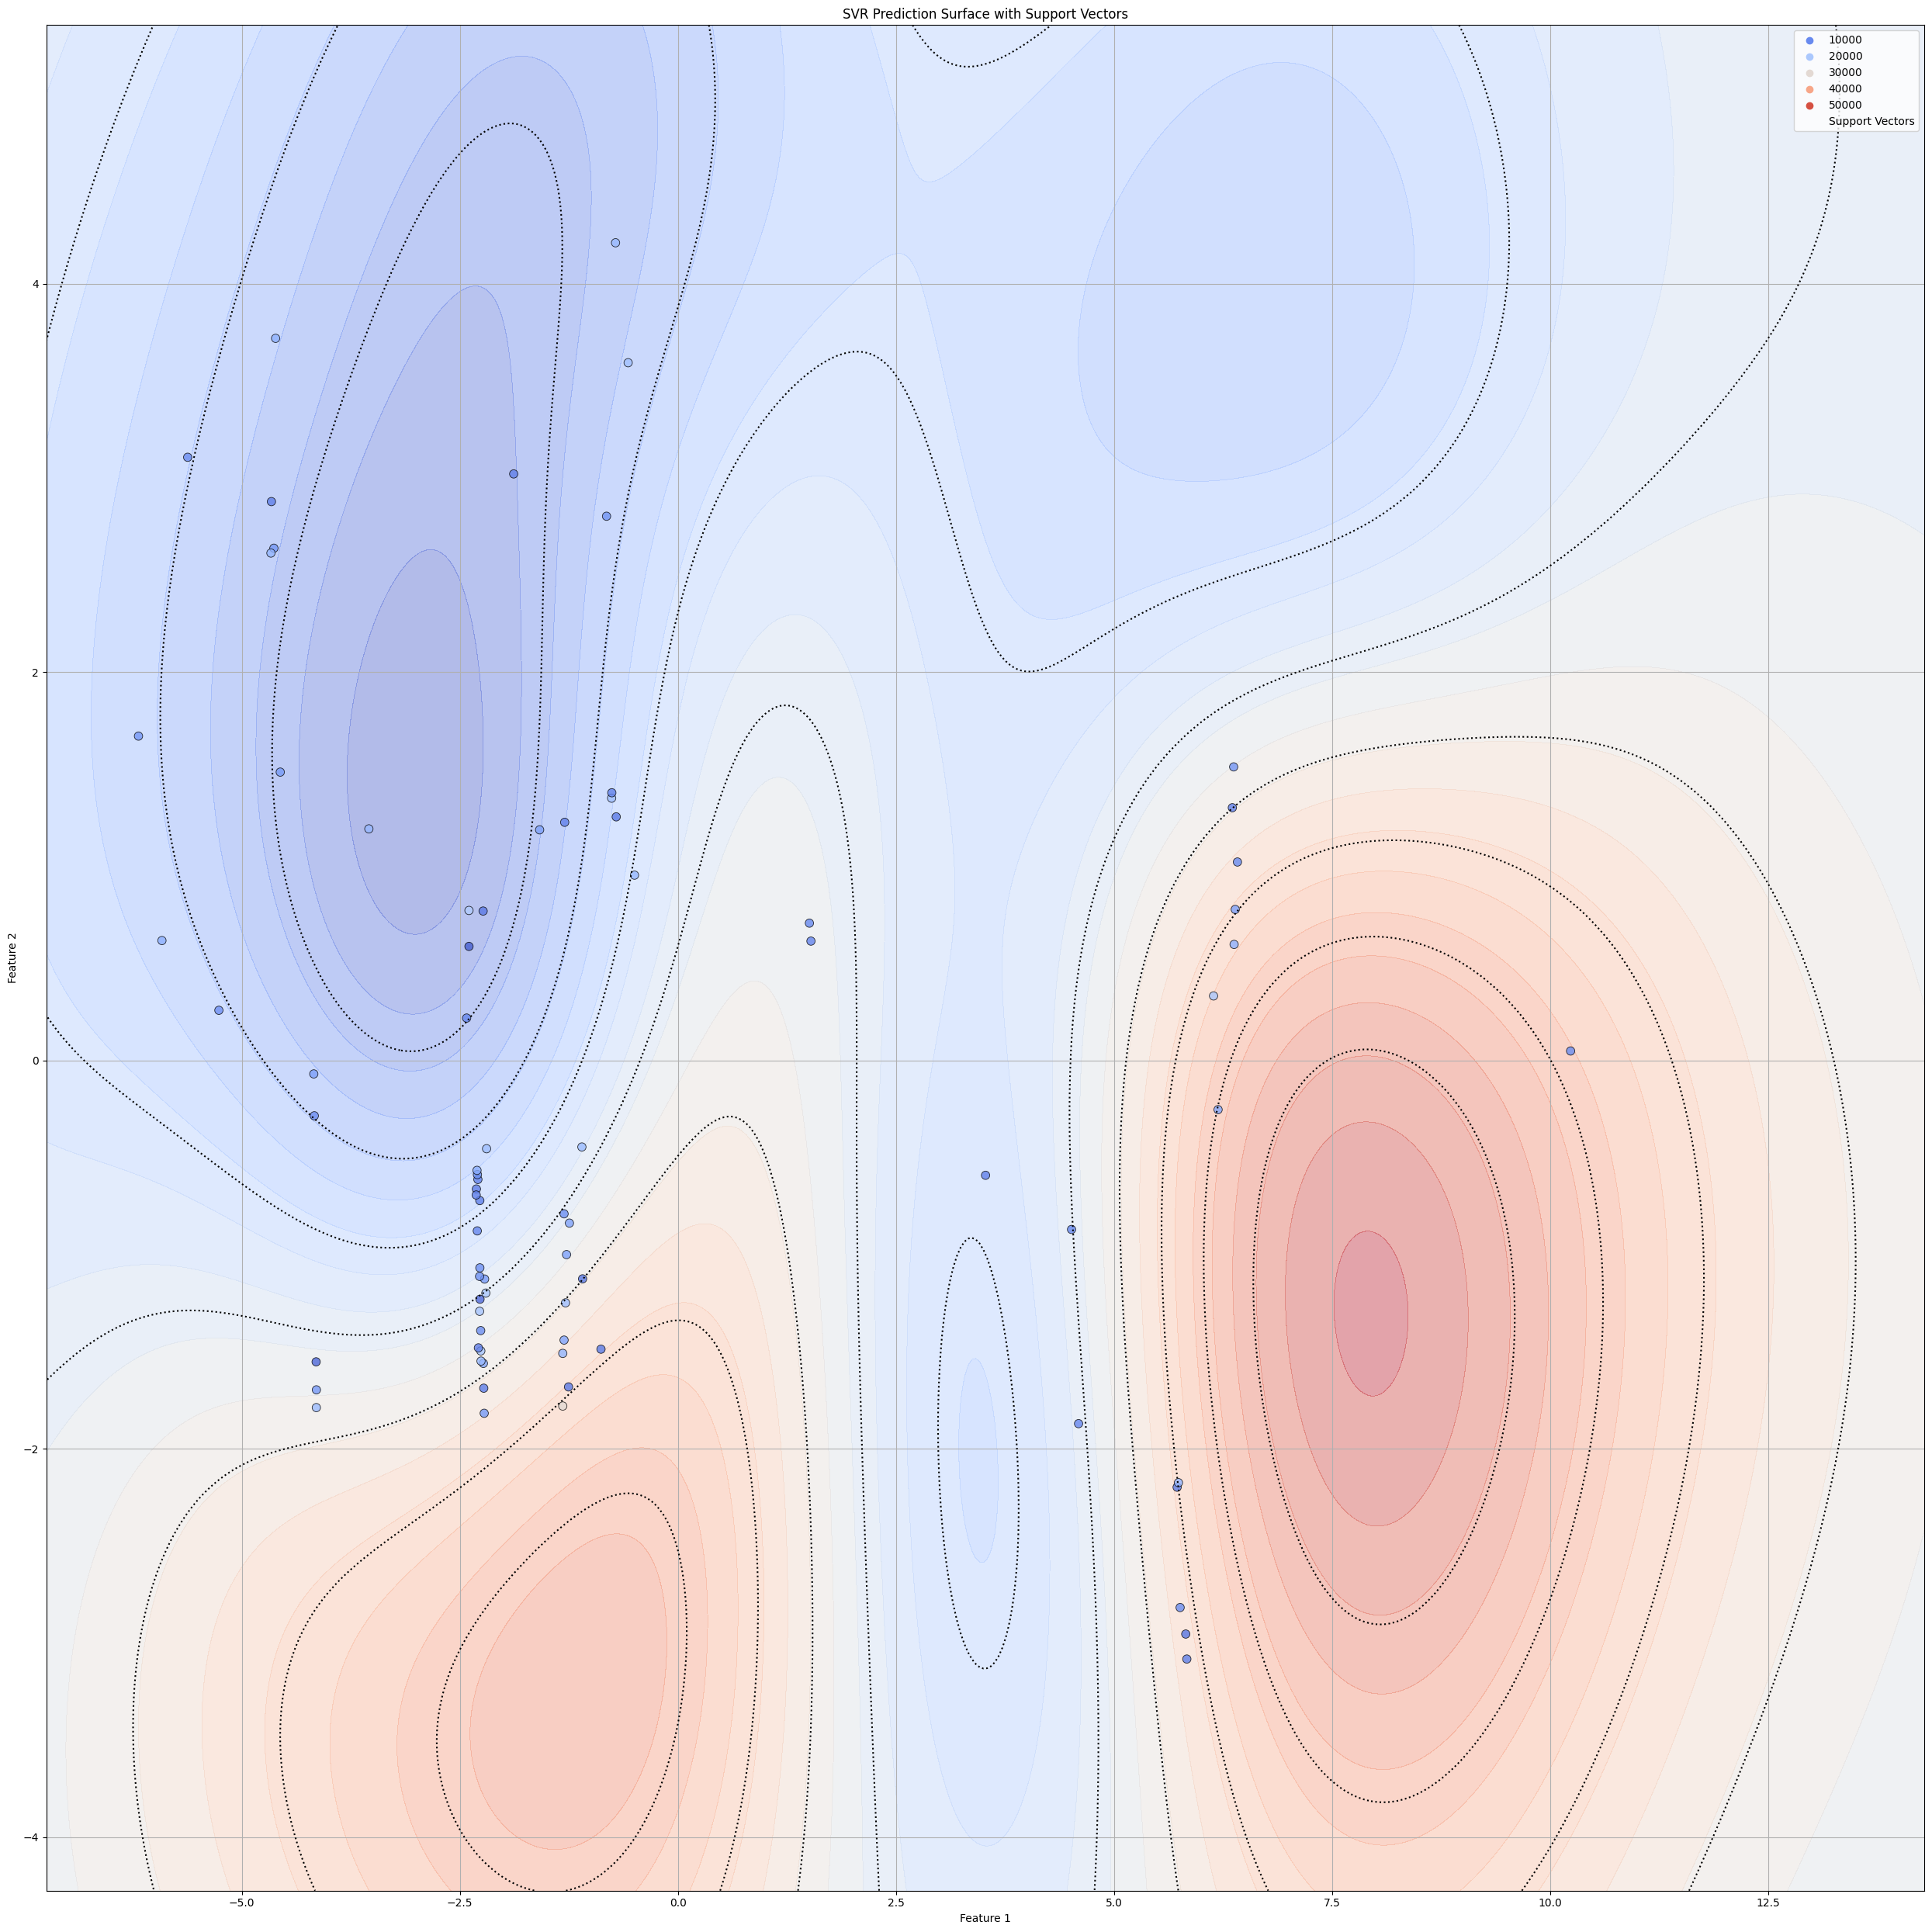

In [39]:
# --- Assume best_model is a trained linear SVR and x_test has 2 features ---

# Build x_test_df
if isinstance(x_test, np.ndarray):
    feature_names = ['Feature 1', 'Feature 2']
    if x_test.shape[1] != len(feature_names):
        feature_names = [f'Feature{i}' for i in range(x_test.shape[1])]
    x_test_df = pd.DataFrame(x_test, columns=feature_names)
else:
    x_test_df = x_test


# Create a mesh grid
x_min, x_max = x_test_df.iloc[:, 0].min() - 1, x_test_df.iloc[:, 0].max() + 1
y_min, y_max = x_test_df.iloc[:, 1].min() - 1, x_test_df.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Get predictions for grid
Z = best_model.predict(grid).reshape(xx.shape)

# Plot
plt.figure(figsize=(25, 25))

# Background prediction surface
plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.4)

# Optional: Overlay model prediction "lines" (useful in regression)
contours = plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 10), colors='k', linestyles='dotted')

# Scatter plot of actual test data
sns.scatterplot(
    x=x_test_df.iloc[:, 0], y=x_test_df.iloc[:, 1],
    hue=y_test, palette='coolwarm', s=60, edgecolor='k', alpha=0.8
)

# Plot support vectors (only if available)
if hasattr(best_model, "support_vectors_"):
    sv = best_model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', label='Support Vectors') # edgecolors='black',

plt.xlabel(x_test_df.columns[0])
plt.ylabel(x_test_df.columns[1])
plt.title("SVR Prediction Surface with Support Vectors")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Regression Hypersurface of the best model on test dataset (2D)

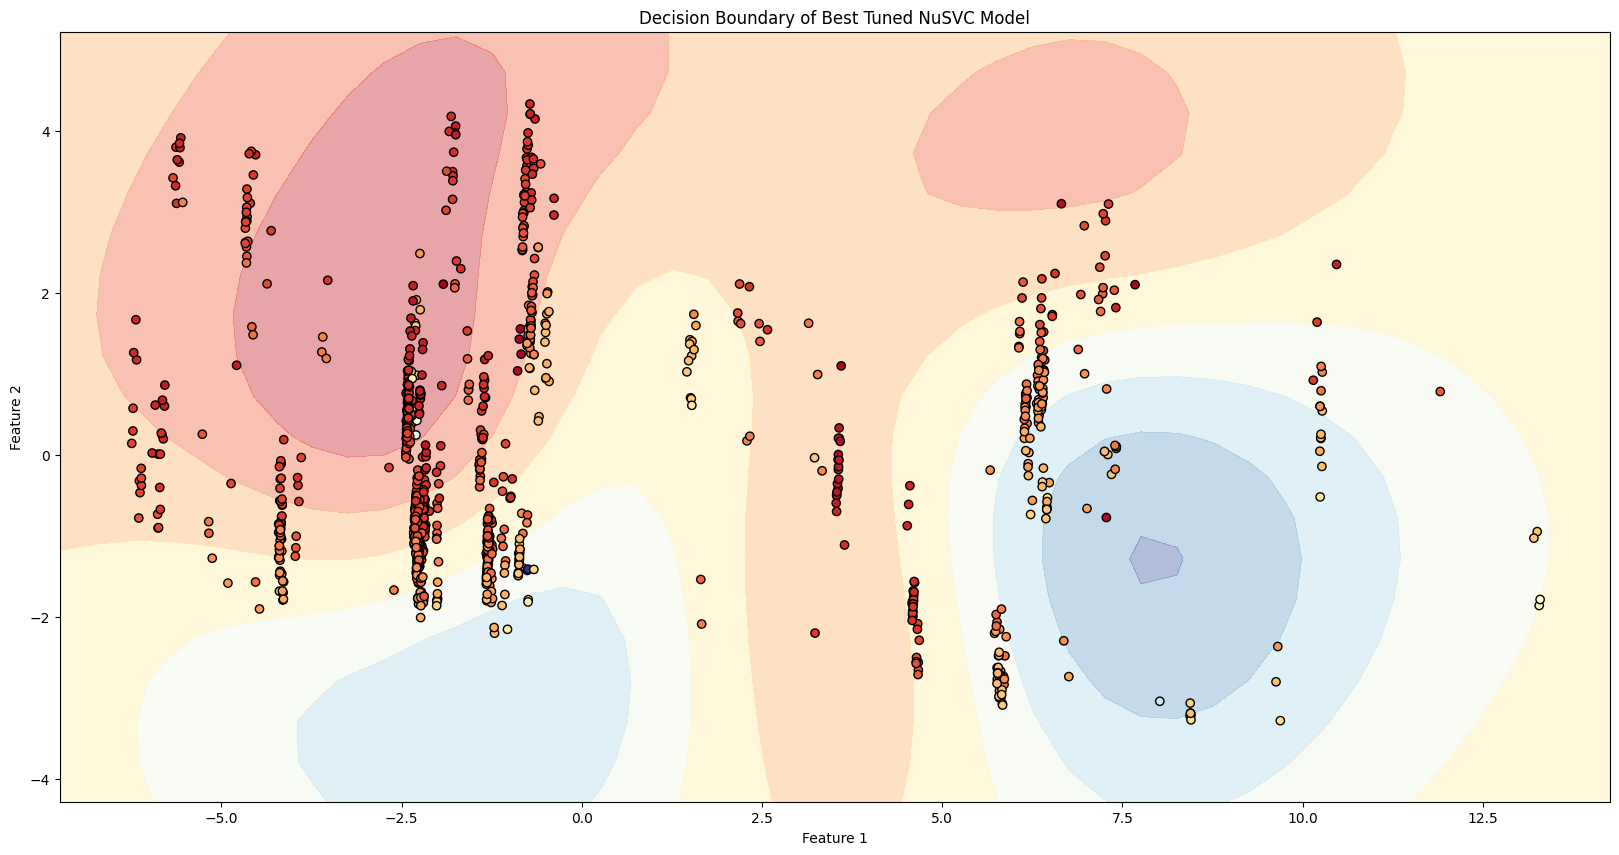

In [40]:
# Create a mesh grid with larger step size to reduce memory usage
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
step_size = 0.5  # Increased from 0.1 to 0.5 to reduce grid points
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Predict on the mesh grid in one step to avoid redundant copies
grid_points = np.stack([xx.ravel(), yy.ravel()], axis=1)  # More memory-efficient than np.c_
Z = best_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(20, 10))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.title('Decision Boundary of Best Tuned NuSVC Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Regression Hypersurface of the best model on test dataset (3D)

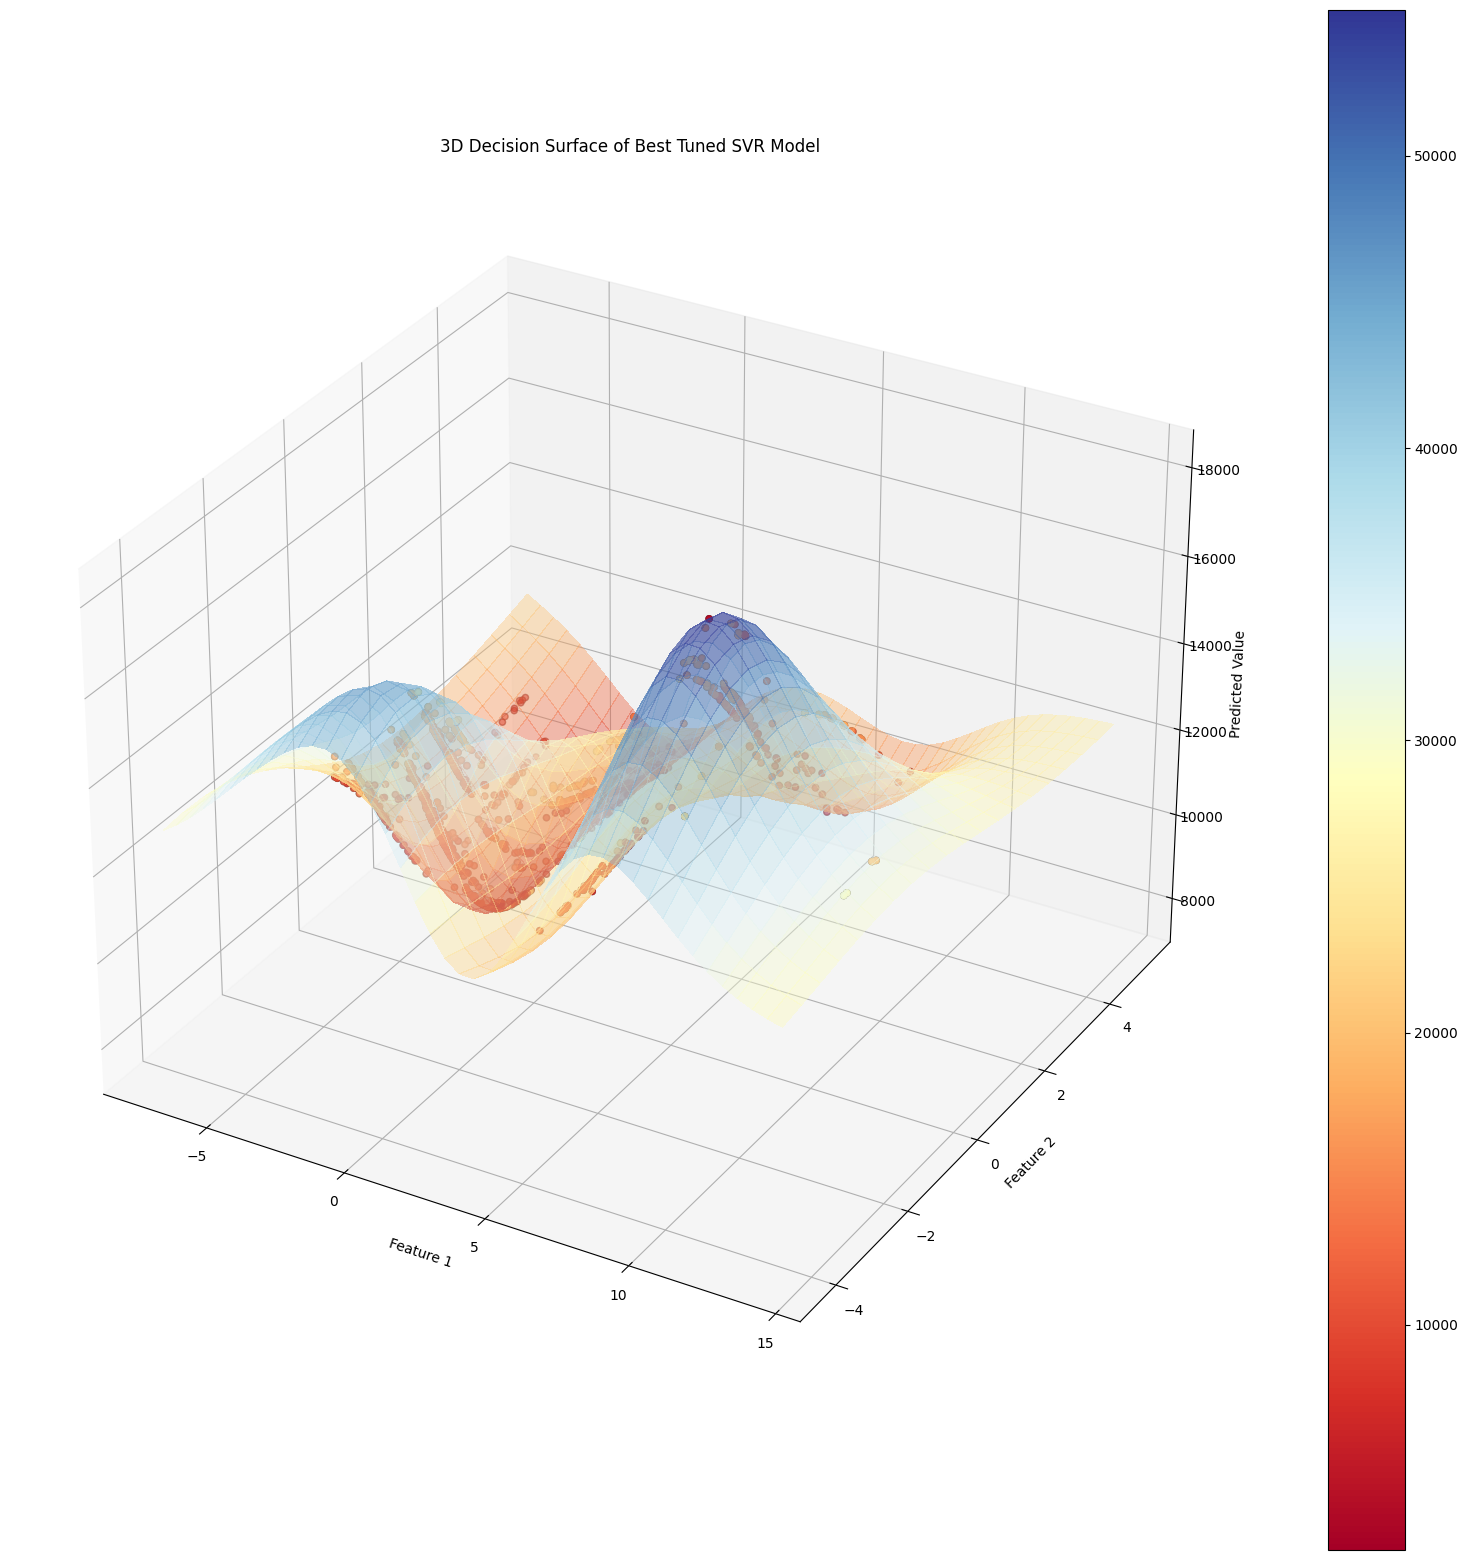

In [41]:
# Create a mesh grid with larger step size to reduce memory usage
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
step_size = 0.5  # Increased from 0.1 to 0.5 to reduce grid points
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Predict on the mesh grid in one step to avoid redundant copies
grid_points = np.stack([xx.ravel(), yy.ravel()], axis=1)
Z = best_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Create 3D plot
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision surface
surf = ax.plot_surface(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.4, linewidth=0, antialiased=False)

# Predict Z values for training data to scatter
Z_test = best_model.predict(x_test)
ax.scatter(x_test[:, 0], x_test[:, 1], Z_test, c=y_test, cmap=plt.cm.RdYlBu, edgecolors='k')

# Add labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted Value')
ax.set_title('3D Decision Surface of Best Tuned SVR Model')

# Add a color bar for the scatter points
plt.colorbar(ax.scatter(x_test[:, 0], x_test[:, 1], Z_test, c=y_test, cmap=plt.cm.RdYlBu))

plt.show()